In [56]:
import os
import sys
import time
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [57]:
#To load the dataset
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df['target']=cancer.target
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [59]:
#To check null values

df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [60]:
# To split the data

X = df.iloc[: , :-1] # independent
y = df.iloc[: , -1] # dependent

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
len(X_train),len(y_train)

(455, 455)

In [62]:
len(X_test),len(y_test)

(114, 114)

mean radius


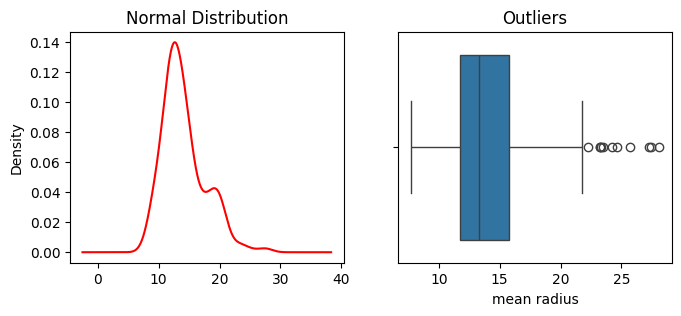

mean texture


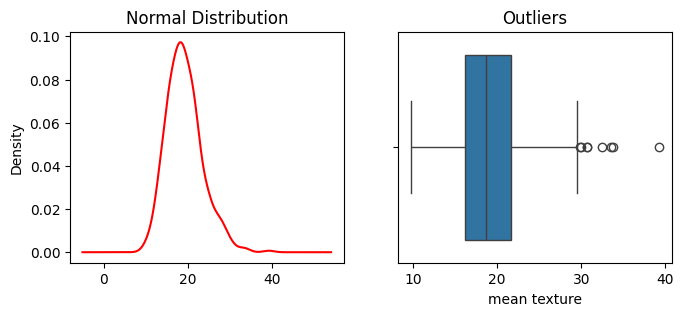

mean perimeter


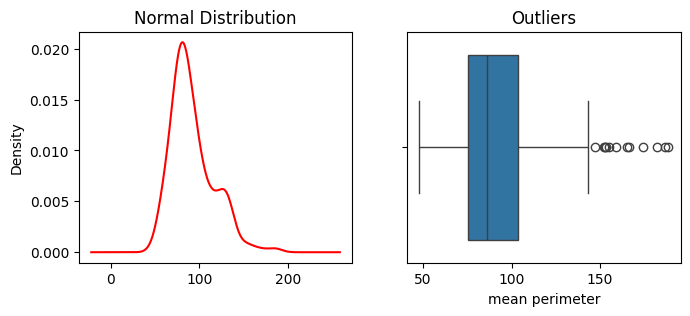

mean area


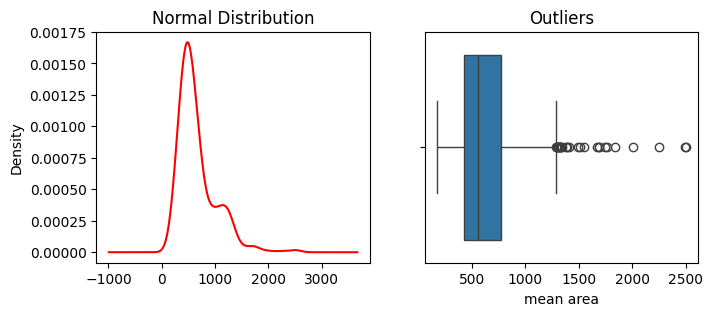

mean smoothness


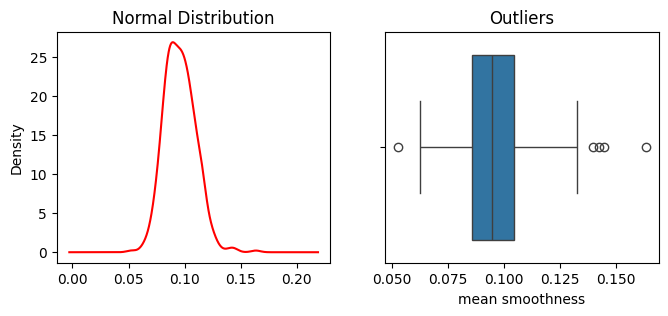

mean compactness


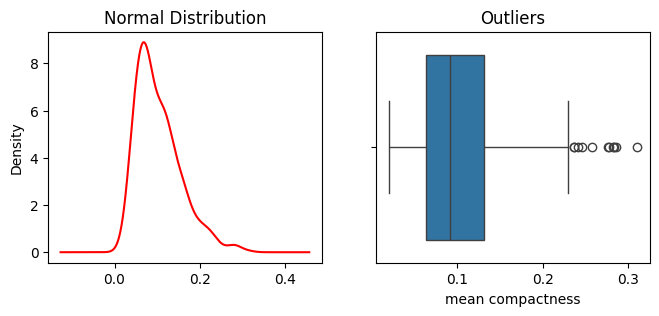

mean concavity


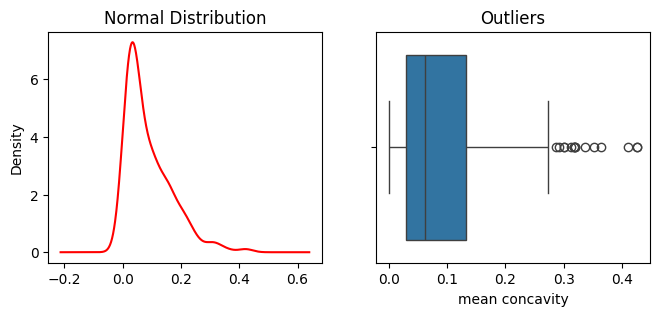

mean concave points


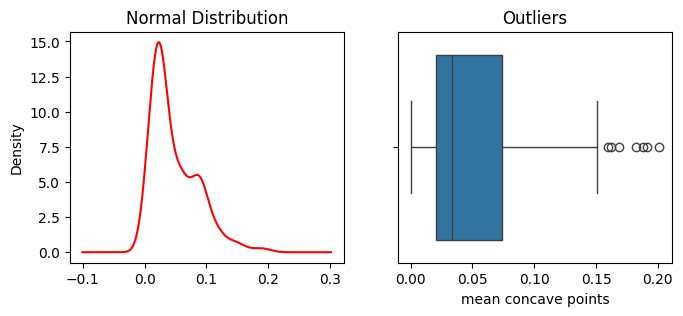

mean symmetry


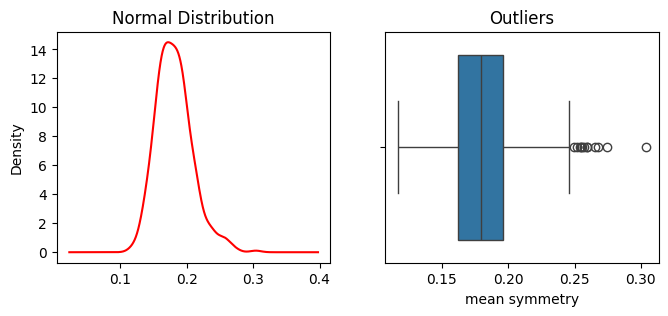

mean fractal dimension


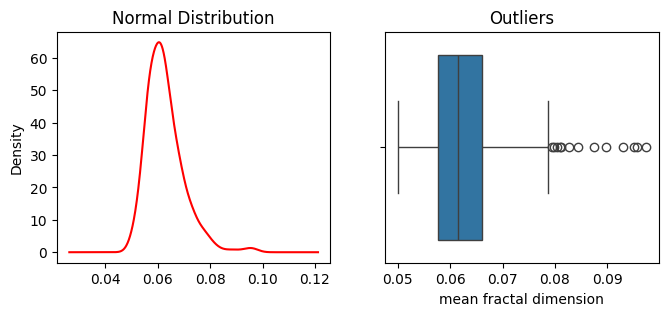

radius error


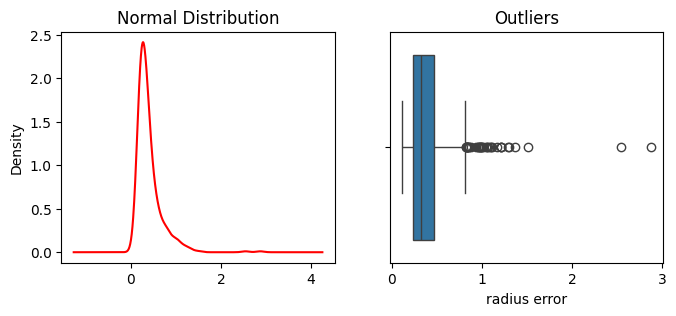

texture error


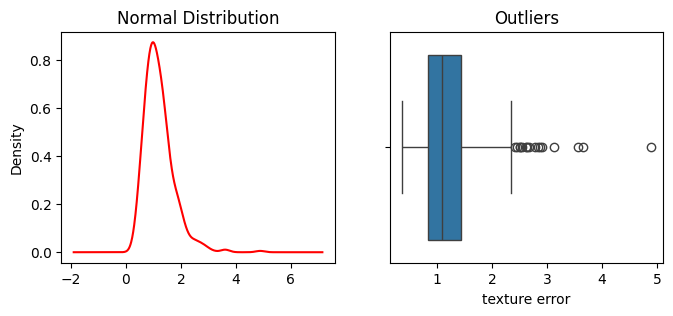

perimeter error


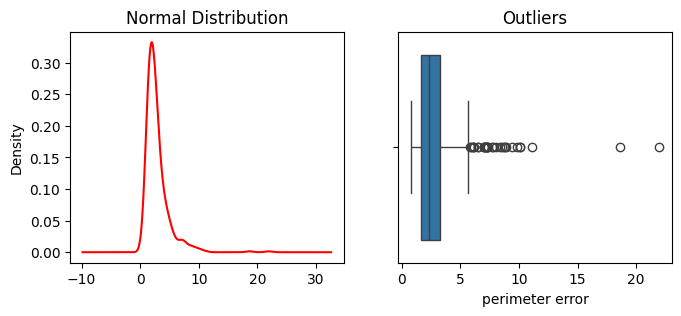

area error


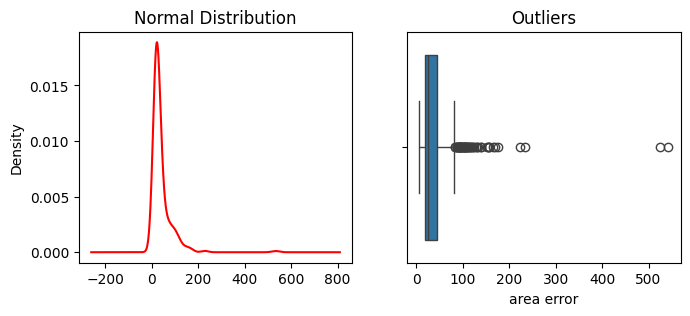

smoothness error


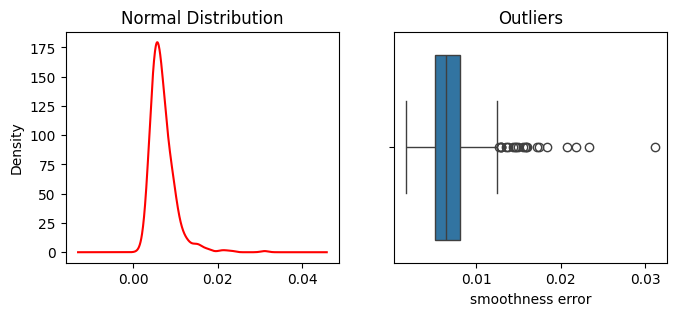

compactness error


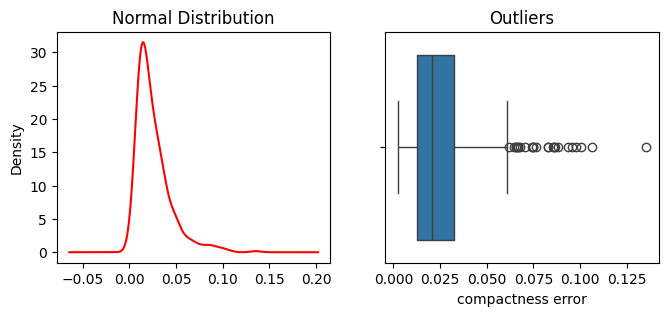

concavity error


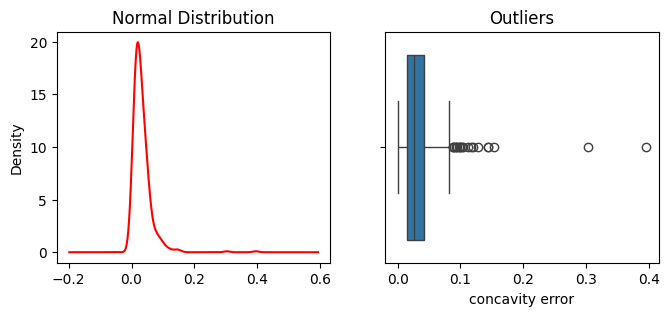

concave points error


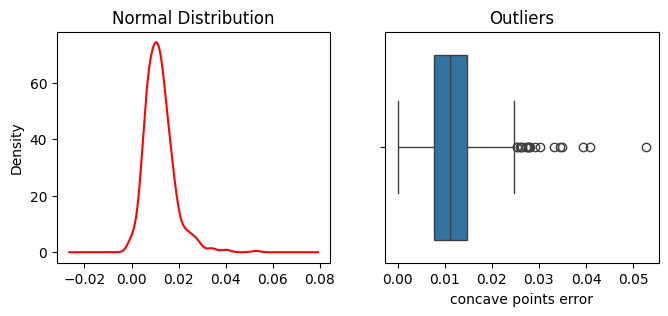

symmetry error


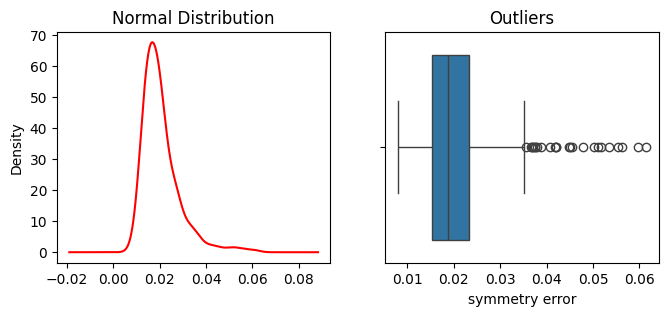

fractal dimension error


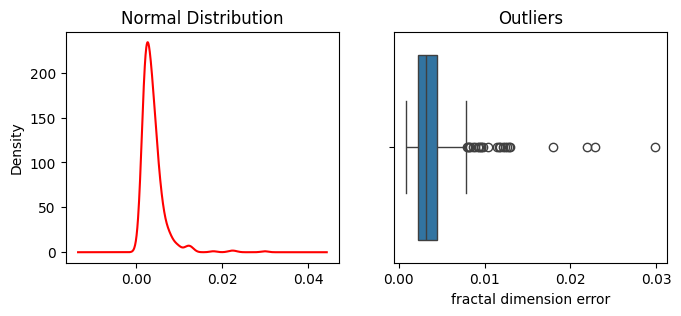

worst radius


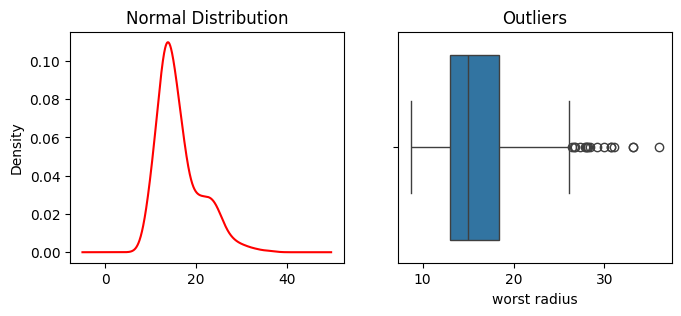

worst texture


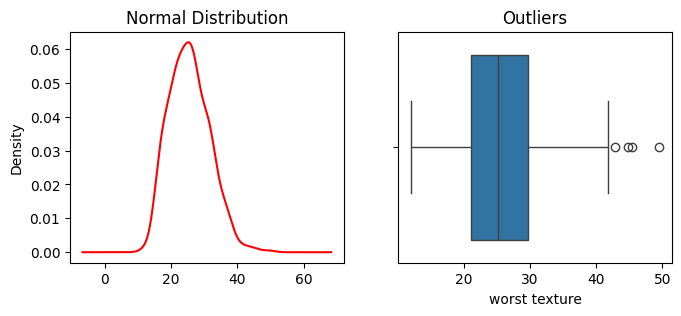

worst perimeter


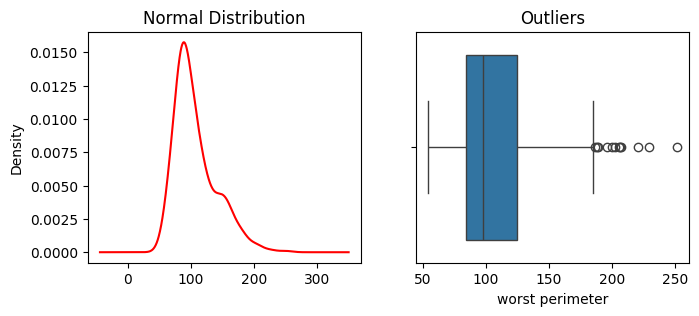

worst area


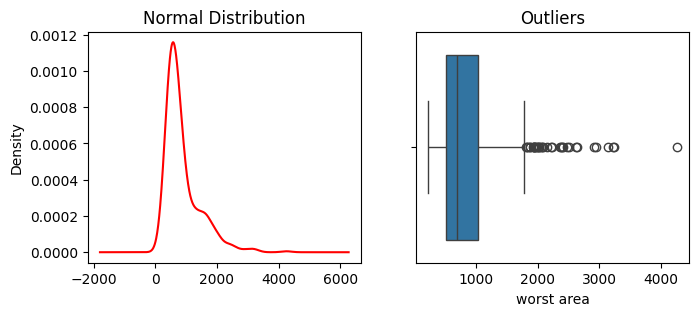

worst smoothness


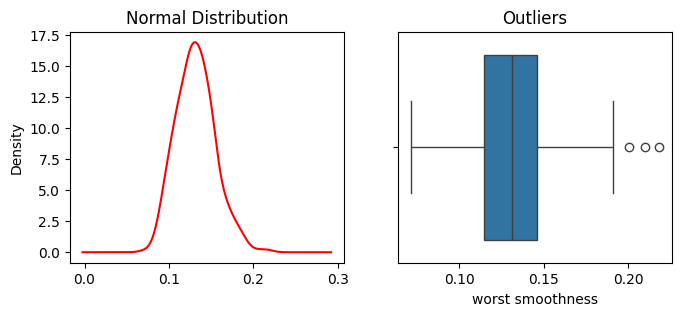

worst compactness


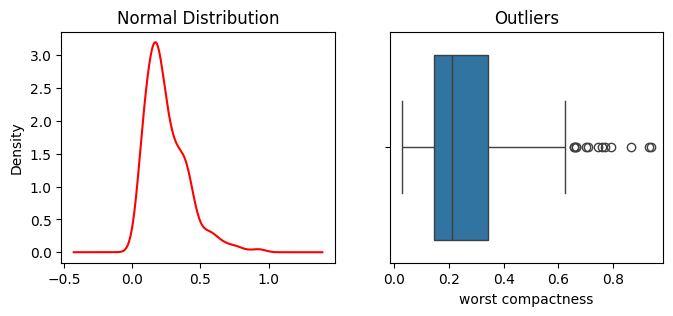

worst concavity


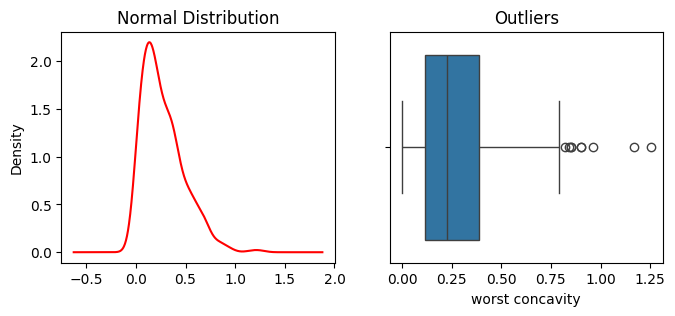

worst concave points


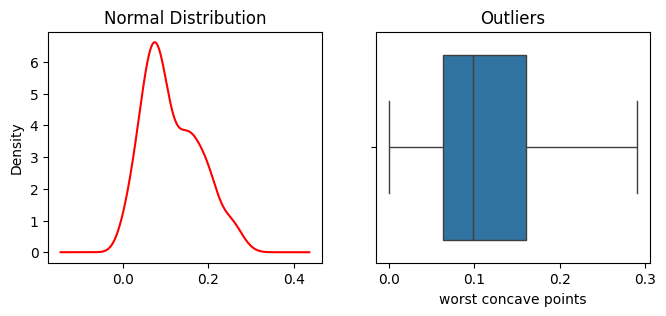

worst symmetry


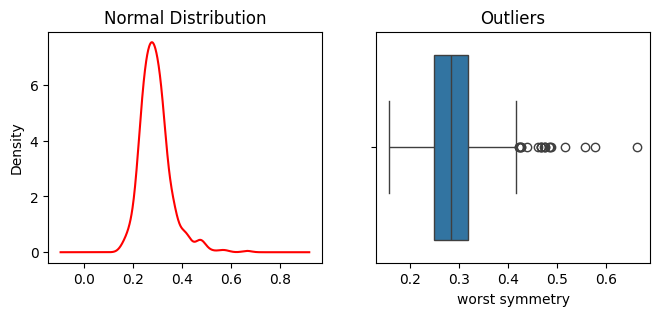

worst fractal dimension


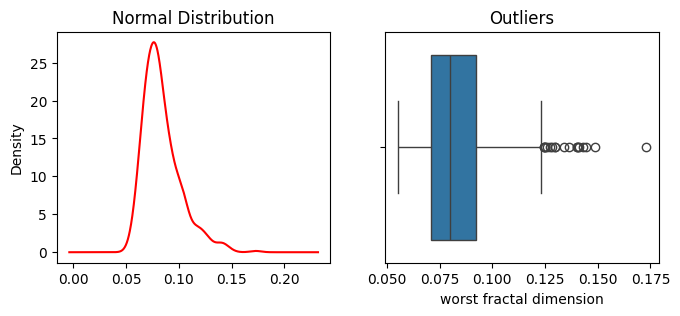

In [63]:
# to check each column outliers
def outlier_checking(X_train,var):
  print(var)
  plt.figure(figsize=(12,3))
  plt.subplot(1,3,1)
  plt.title('Normal Distribution')
  X_train[var].plot(kind='kde',color='r')
  plt.subplot(1,3,2)
  plt.title('Outliers')
  sns.boxplot(x = X_train[var])
  plt.show()

for i in X_train.columns:
  outlier_checking(X_train,i)

**To handle outliers**

trimming

capping

5th and 95th quantile





**5th and 95th quantile techniwue for above data**

In [64]:
def outlier_handling(X_train,var):
  upper_limit = X_train[var].quantile(0.95)
  lower_limit = X_train[var].quantile(0.05)

  return upper_limit,lower_limit


In [65]:
for i in X_train.columns:
  upper_limit,lower_limit = outlier_handling(X_train,i)
  X_train[i+'_5th'] = np.where(X_train[i] > upper_limit,upper_limit,
         np.where(X_train[i] < lower_limit,lower_limit,X_train[i]))

mean radius_5th


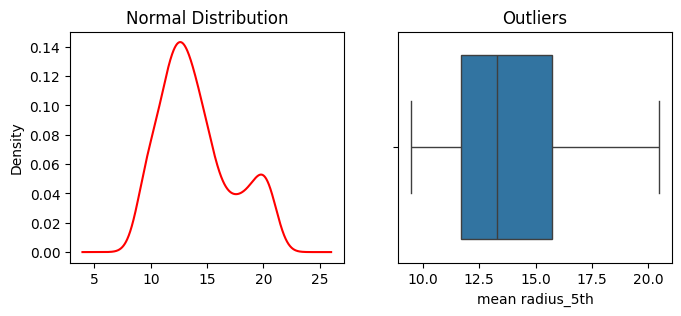

mean texture_5th


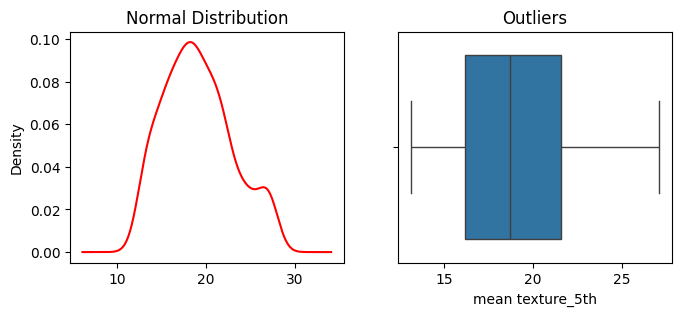

mean perimeter_5th


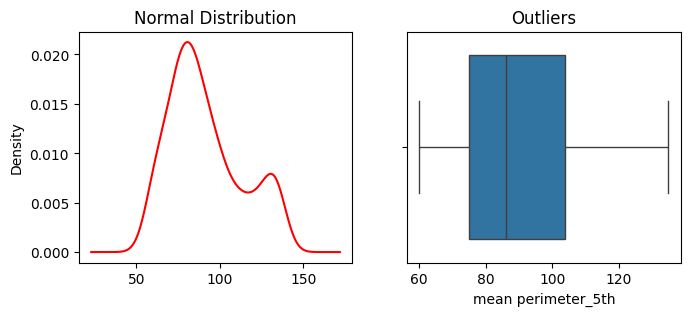

mean area_5th


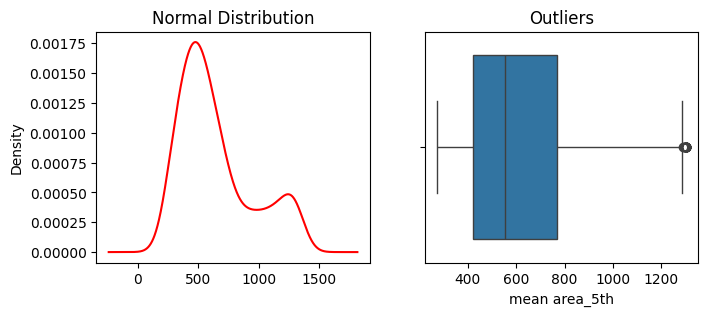

mean smoothness_5th


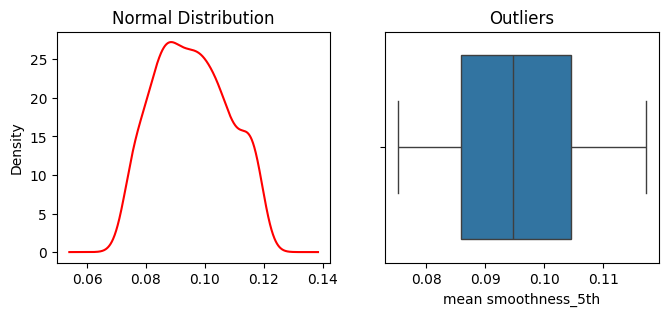

mean compactness_5th


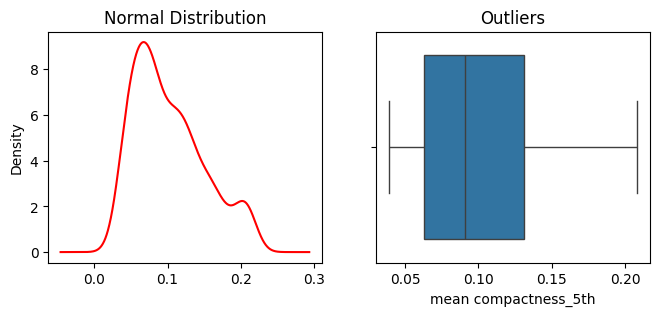

mean concavity_5th


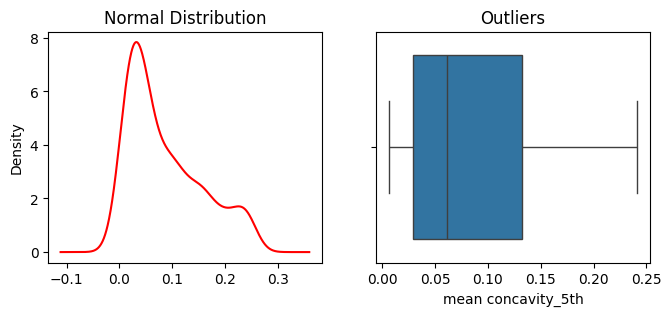

mean concave points_5th


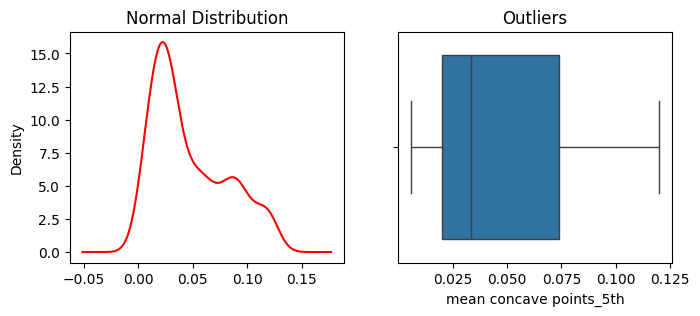

mean symmetry_5th


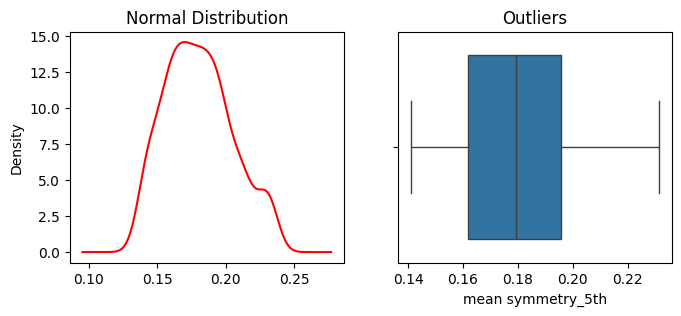

mean fractal dimension_5th


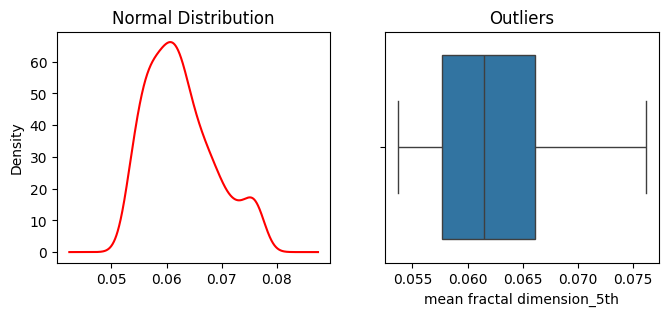

radius error_5th


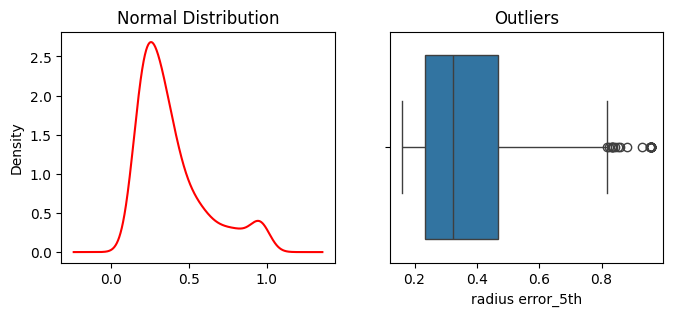

texture error_5th


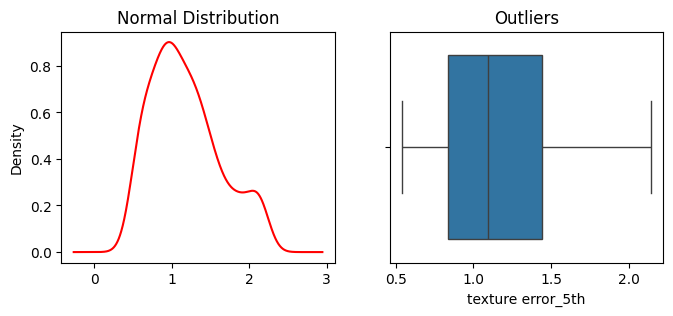

perimeter error_5th


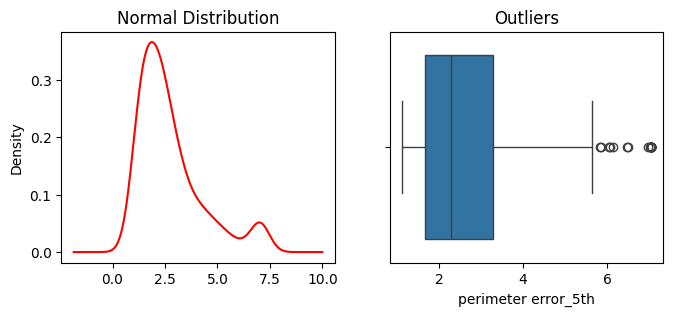

area error_5th


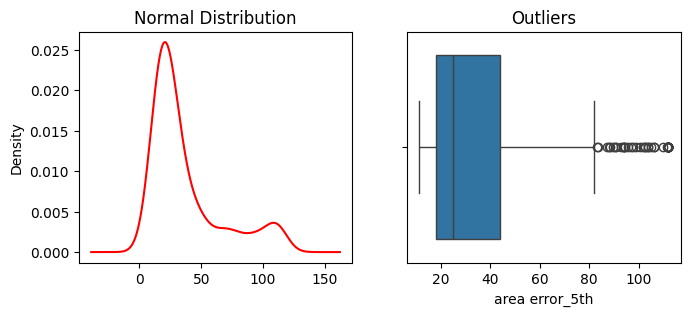

smoothness error_5th


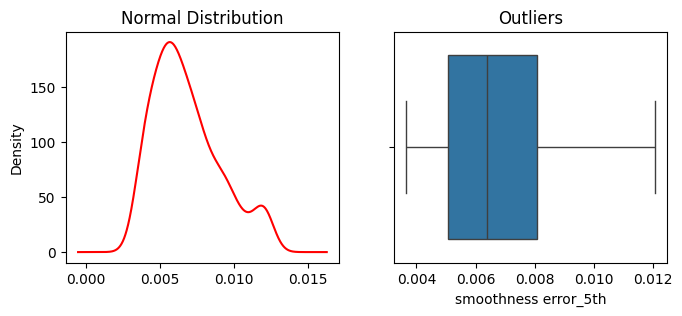

compactness error_5th


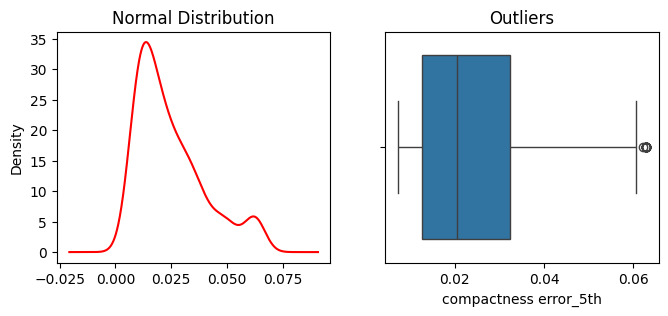

concavity error_5th


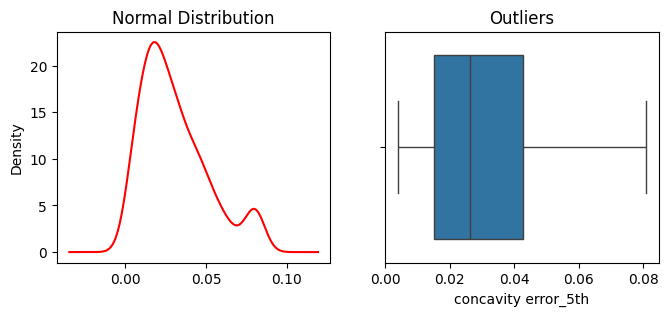

concave points error_5th


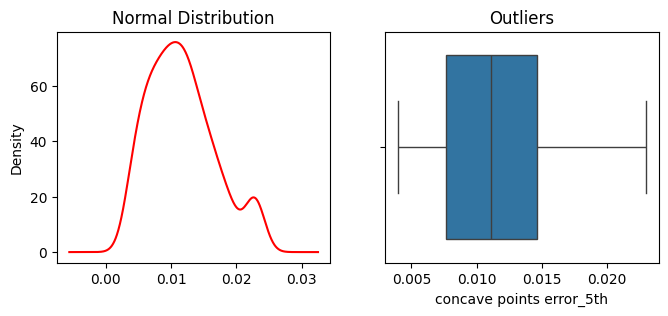

symmetry error_5th


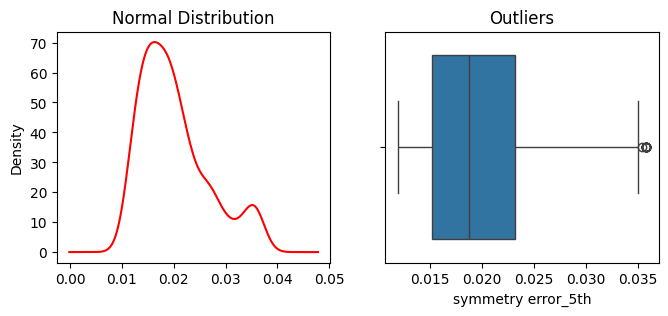

fractal dimension error_5th


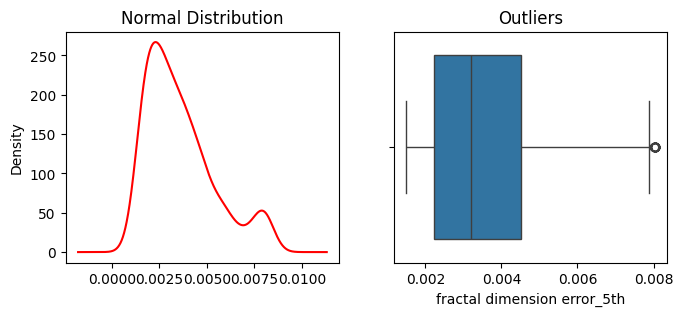

worst radius_5th


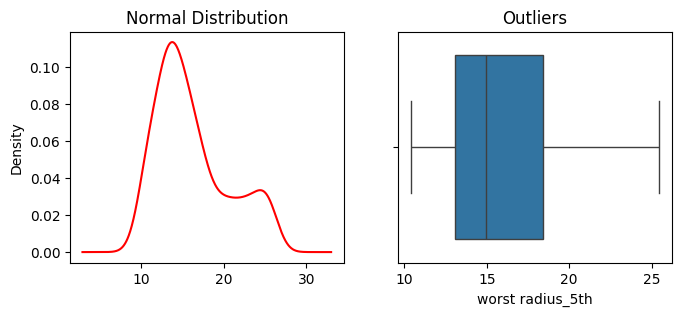

worst texture_5th


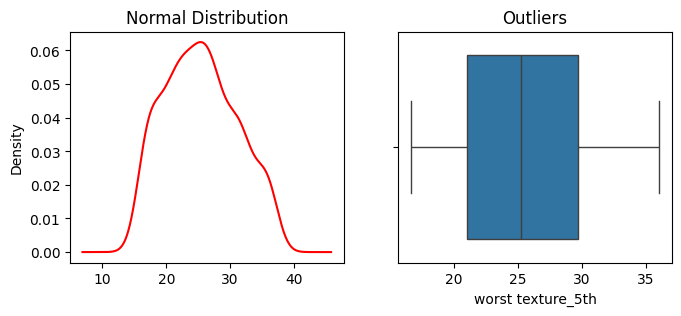

worst perimeter_5th


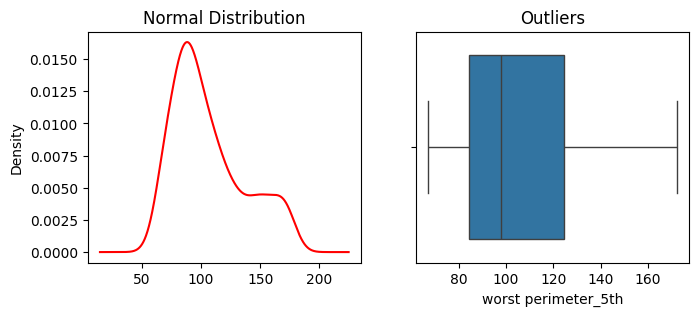

worst area_5th


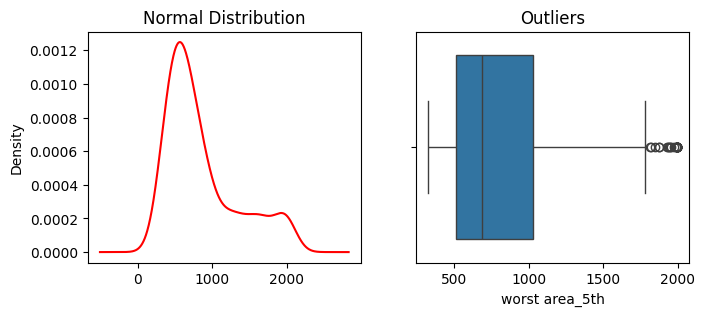

worst smoothness_5th


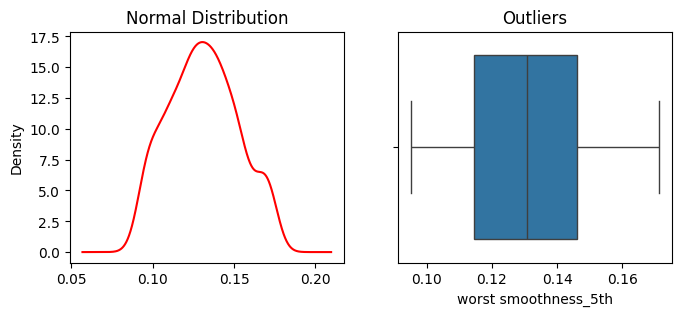

worst compactness_5th


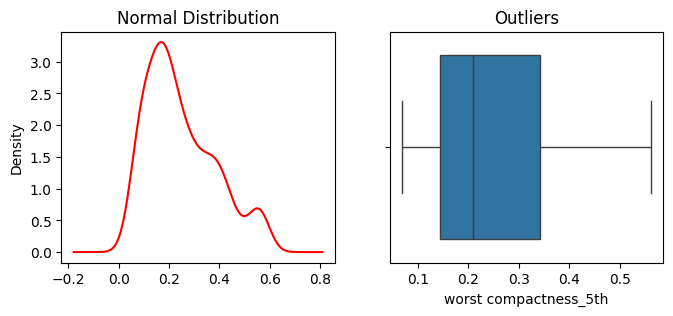

worst concavity_5th


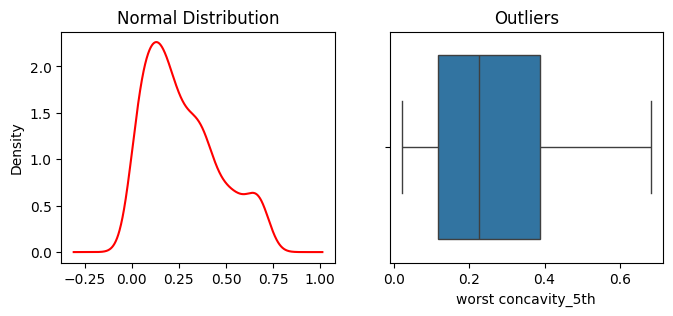

worst concave points_5th


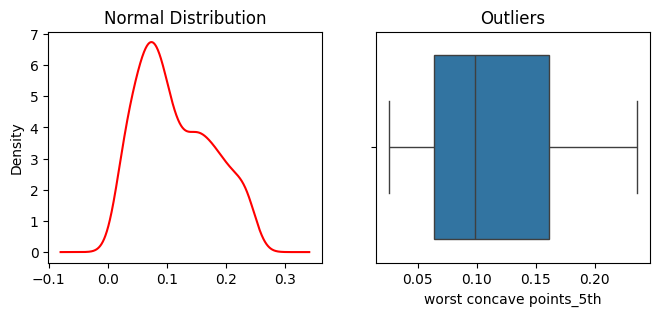

worst symmetry_5th


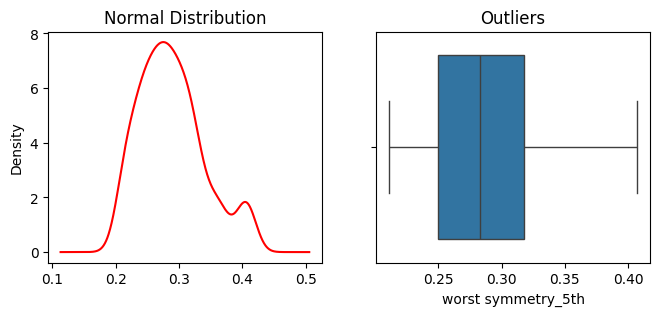

worst fractal dimension_5th


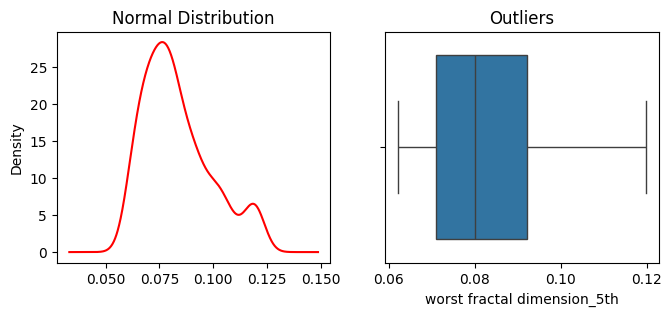

In [66]:
for i in X_train.columns:
  if '_5th' in i:
    outlier_checking(X_train,i)

In [67]:
#To remove original columns

X_train=X_train.drop(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],axis=1)

In [68]:
#For X_test

def outlier_handling(X_test,var):
  upper_limit = X_test[var].quantile(0.95)
  lower_limit = X_test[var].quantile(0.05)

  return upper_limit,lower_limit


for i in X_test.columns:
  upper_limit,lower_limit = outlier_handling(X_test,i)
  X_test[i+'_5th'] = np.where(X_test[i] > upper_limit,upper_limit,
         np.where(X_test[i] < lower_limit,lower_limit,X_test[i]))

X_test=X_test.drop(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],axis=1)

mean radius_5th


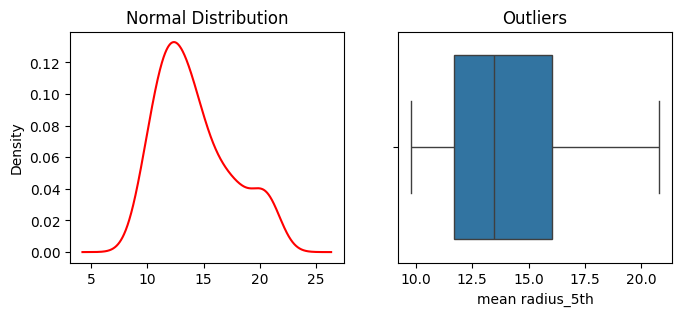

mean texture_5th


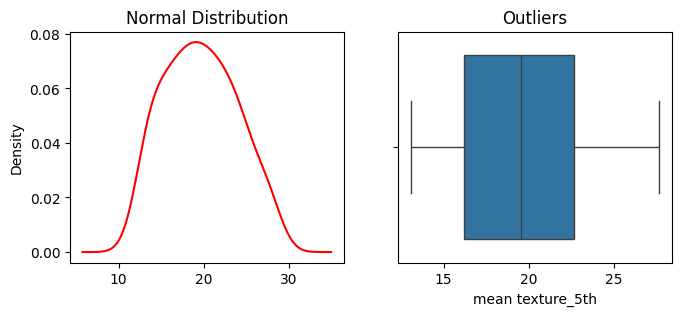

mean perimeter_5th


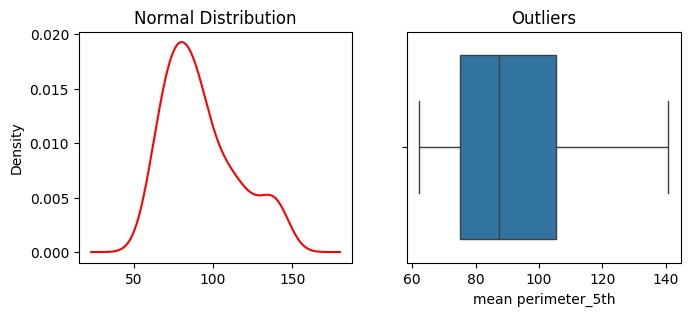

mean area_5th


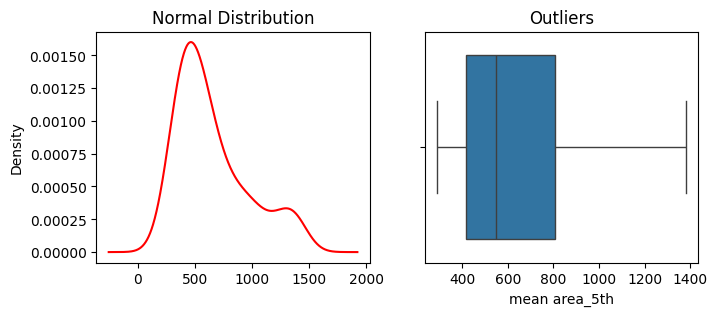

mean smoothness_5th


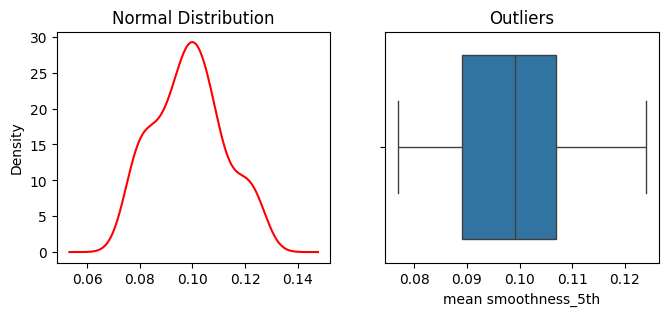

mean compactness_5th


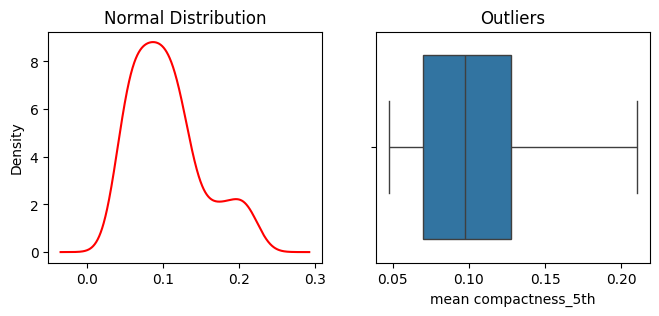

mean concavity_5th


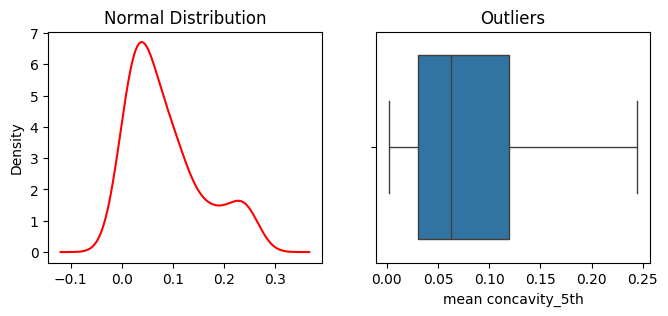

mean concave points_5th


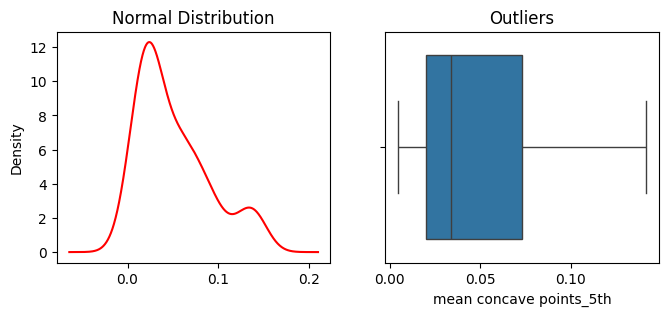

mean symmetry_5th


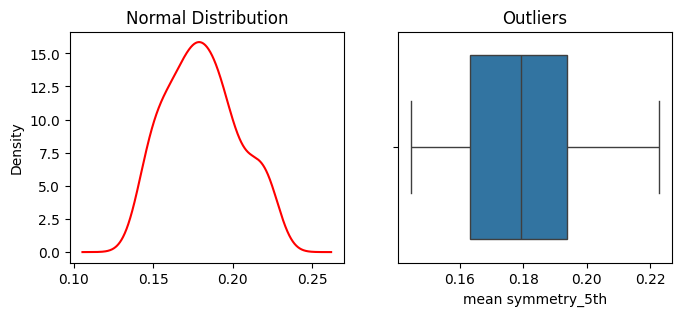

mean fractal dimension_5th


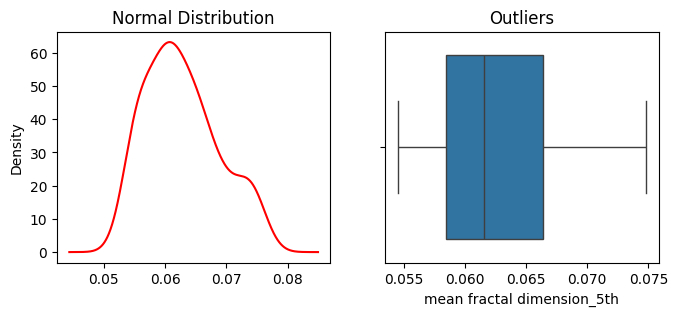

radius error_5th


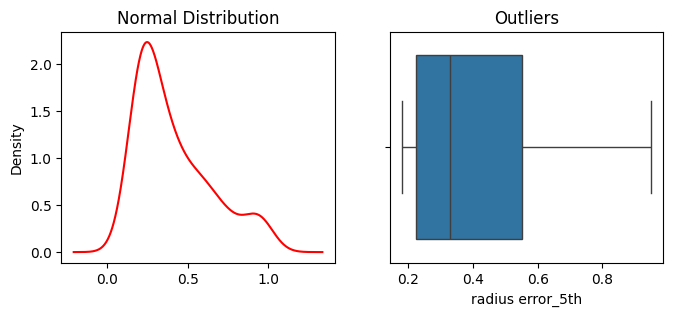

texture error_5th


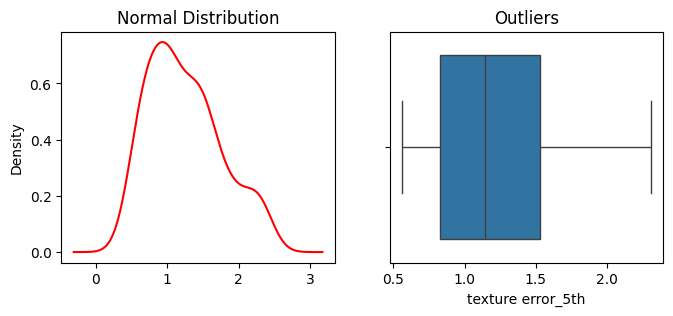

perimeter error_5th


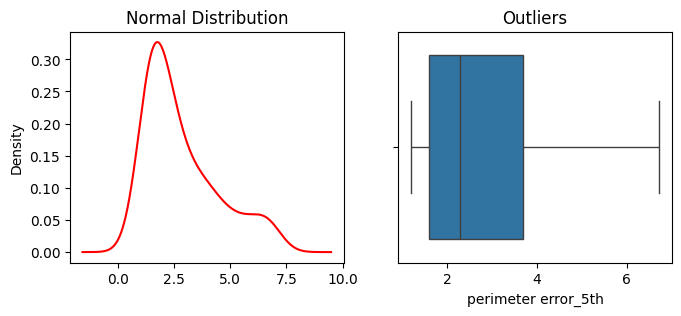

area error_5th


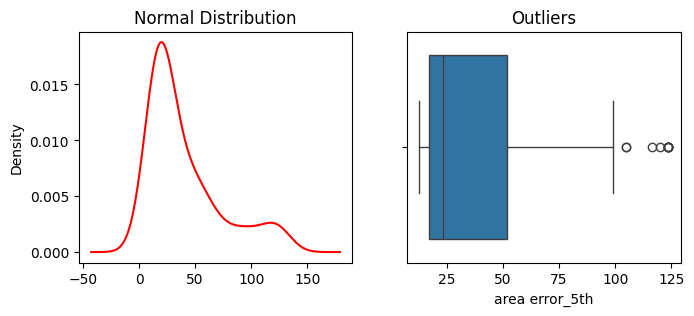

smoothness error_5th


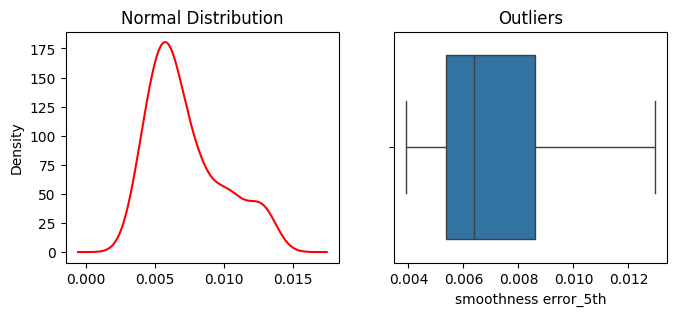

compactness error_5th


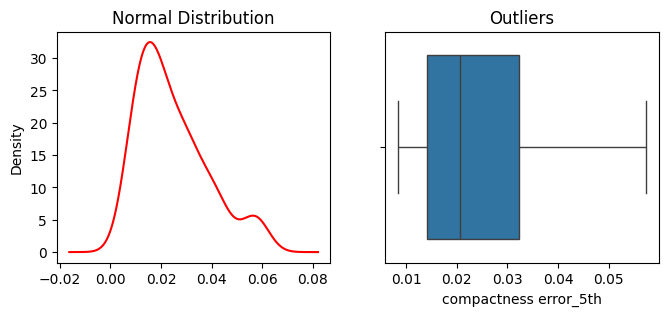

concavity error_5th


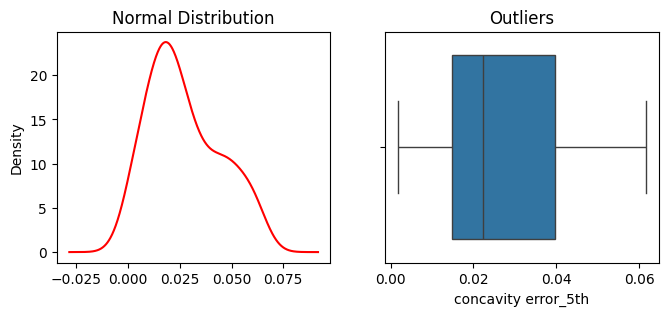

concave points error_5th


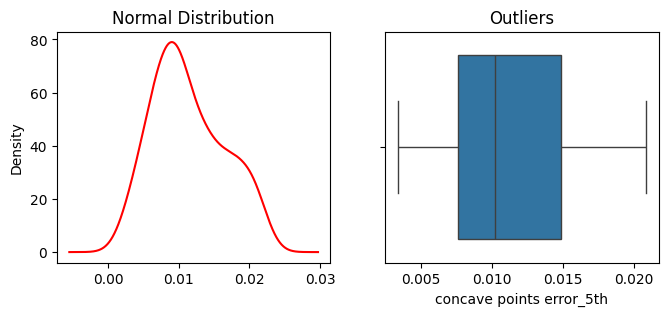

symmetry error_5th


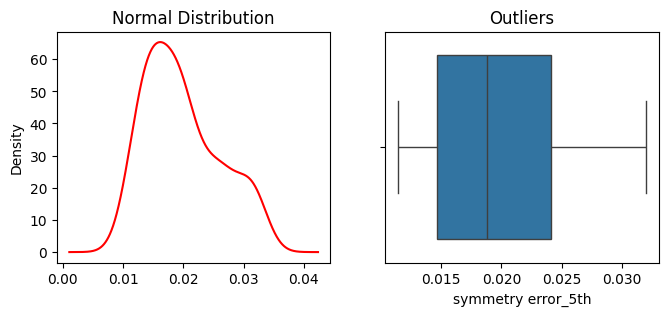

fractal dimension error_5th


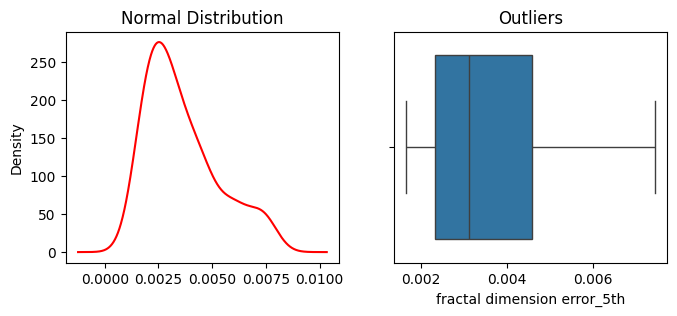

worst radius_5th


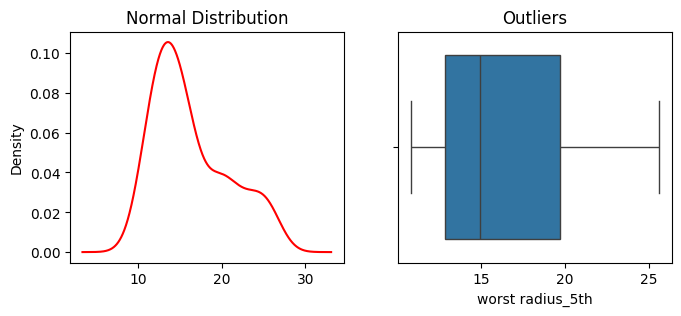

worst texture_5th


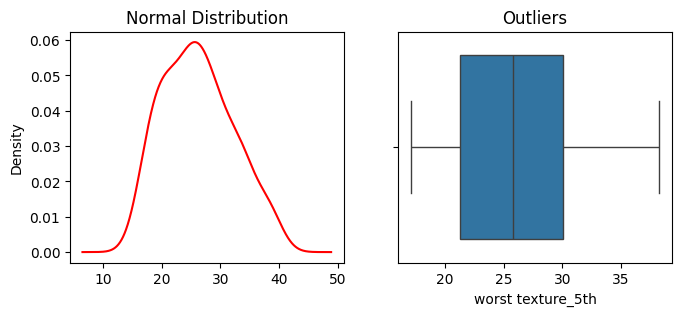

worst perimeter_5th


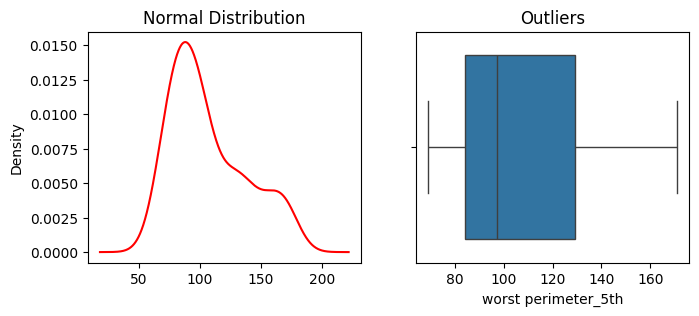

worst area_5th


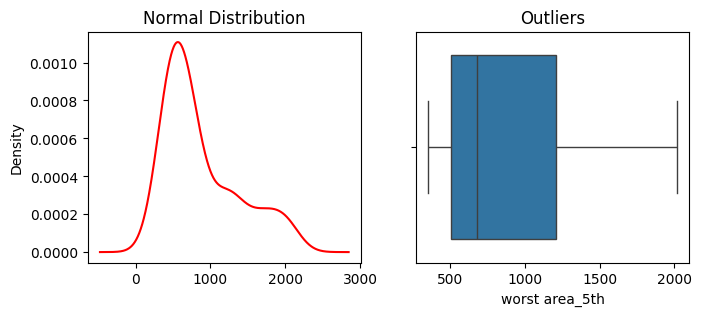

worst smoothness_5th


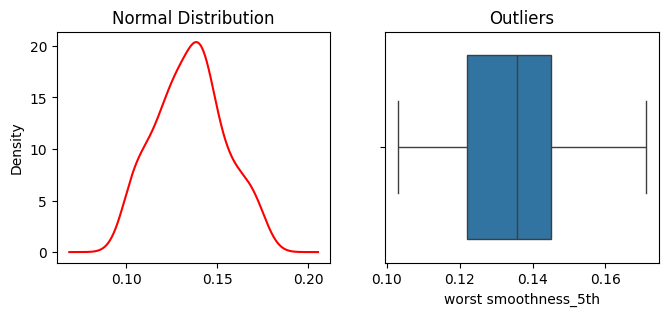

worst compactness_5th


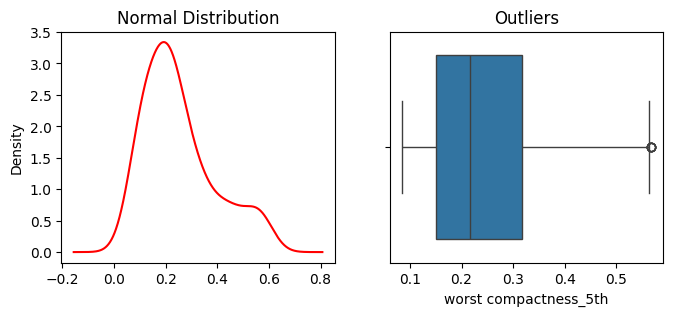

worst concavity_5th


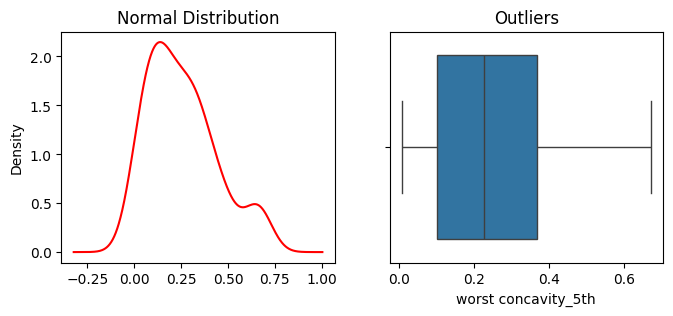

worst concave points_5th


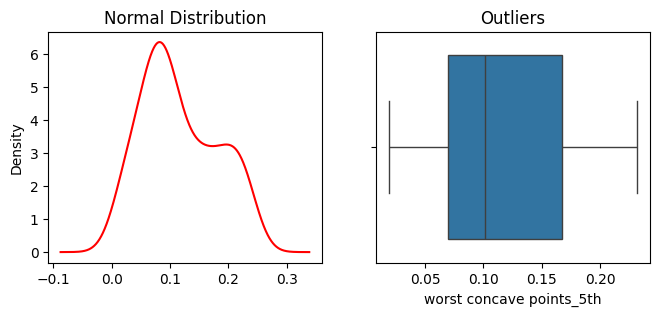

worst symmetry_5th


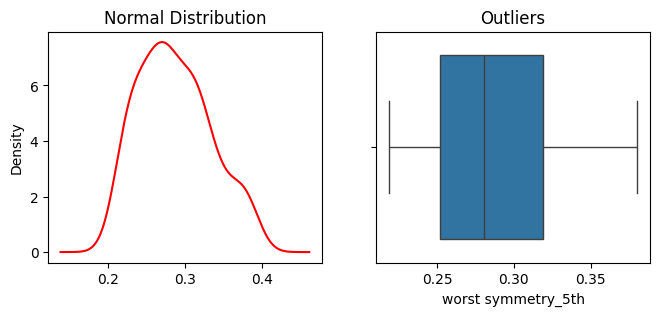

worst fractal dimension_5th


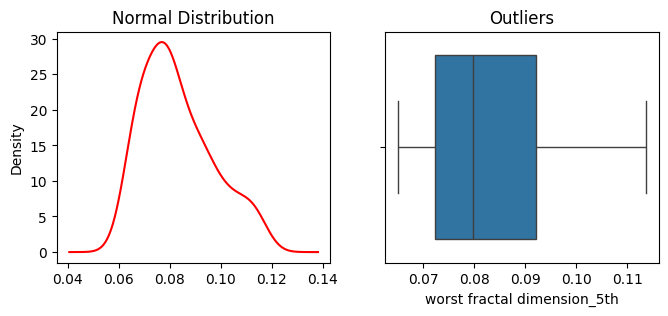

In [69]:
for i in X_test.columns:
  if '_5th' in i:
    outlier_checking(X_test,i)

since 5th and 95th quantile working fine for all the columns except mean area_5th and worst compactness_5th columns -> so for that purpose I am going to apply Trimming technique on those columns

In [70]:
# trimming on train data

def trim(X_train,var):
  iqr = X_train[var].quantile(0.75) - X_train[var].quantile(0.25)
  upper_limit = X_train[var].quantile(0.75) + (1.5 * iqr)
  lower_limit = X_train[var].quantile(0.25) - (1.5 * iqr)

  return upper_limit,lower_limit

for i in X_train.columns:
  upper_limit,lower_limit = trim(X_train,i)
  X_train[i+'trim'] = np.where(X_train[i] > upper_limit,upper_limit,
         np.where(X_train[i] < lower_limit,lower_limit,X_train[i]))

X_train=X_train.drop(['mean radius_5th', 'mean texture_5th', 'mean perimeter_5th',
       'mean area_5th', 'mean smoothness_5th', 'mean compactness_5th',
       'mean concavity_5th', 'mean concave points_5th', 'mean symmetry_5th',
       'mean fractal dimension_5th', 'radius error_5th', 'texture error_5th',
       'perimeter error_5th', 'area error_5th', 'smoothness error_5th',
       'compactness error_5th', 'concavity error_5th',
       'concave points error_5th', 'symmetry error_5th',
       'fractal dimension error_5th', 'worst radius_5th', 'worst texture_5th',
       'worst perimeter_5th', 'worst area_5th', 'worst smoothness_5th',
       'worst compactness_5th', 'worst concavity_5th',
       'worst concave points_5th', 'worst symmetry_5th',
       'worst fractal dimension_5th'],axis=1)



mean radius_5thtrim


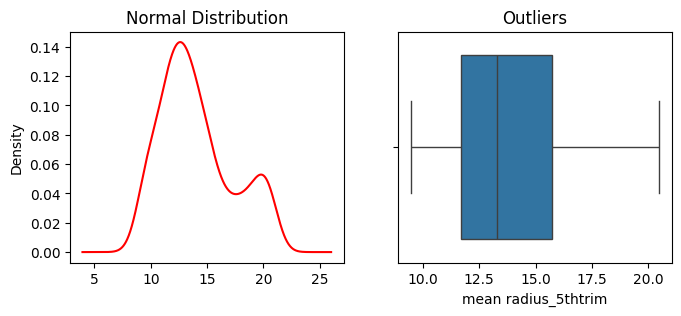

mean texture_5thtrim


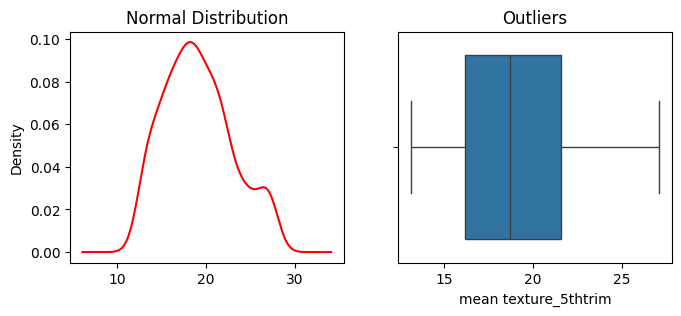

mean perimeter_5thtrim


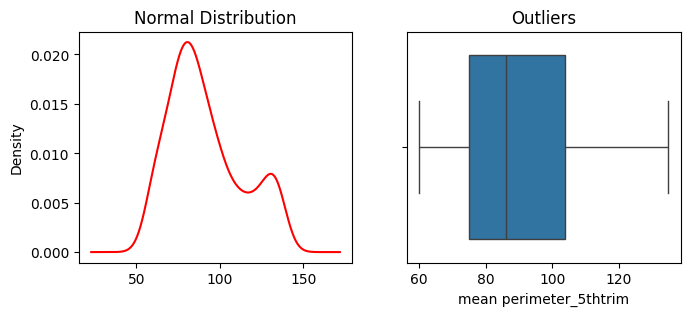

mean area_5thtrim


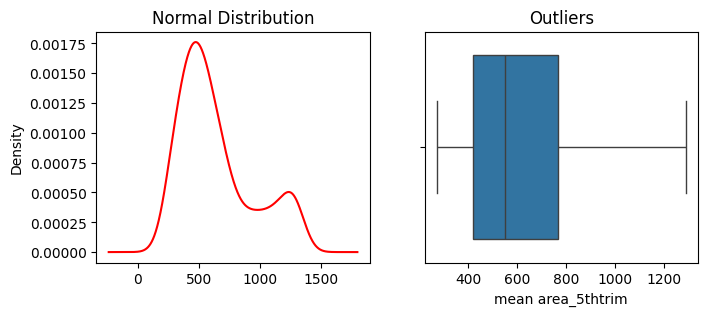

mean smoothness_5thtrim


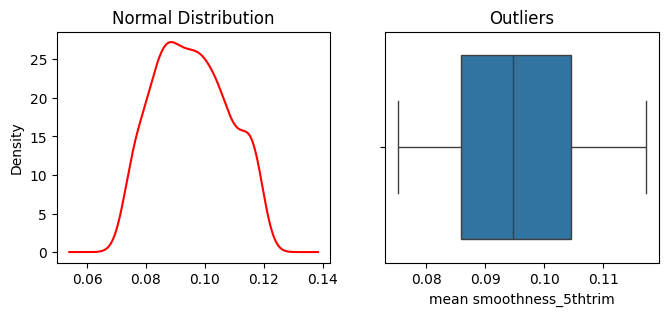

mean compactness_5thtrim


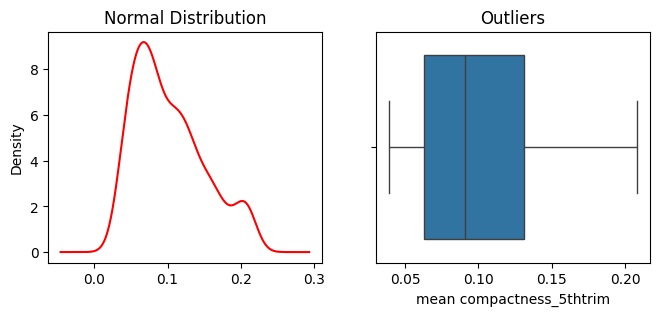

mean concavity_5thtrim


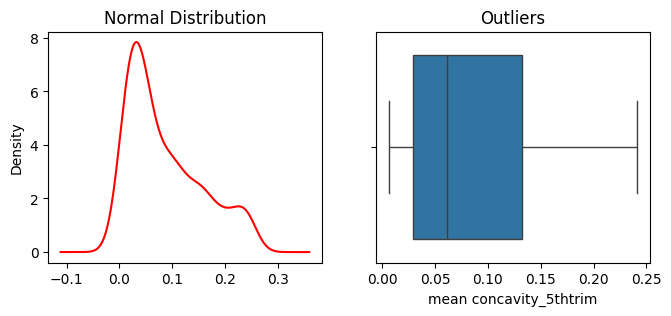

mean concave points_5thtrim


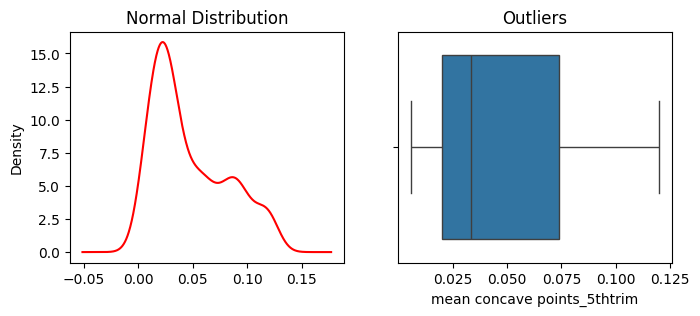

mean symmetry_5thtrim


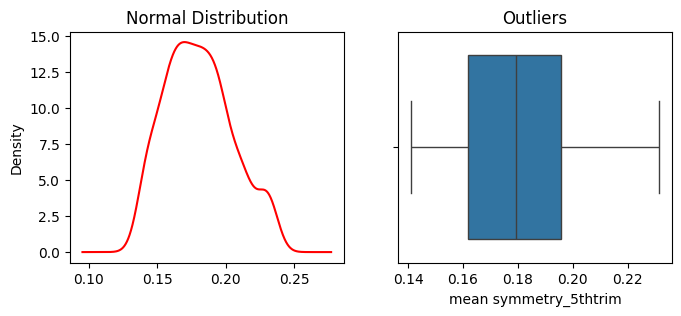

mean fractal dimension_5thtrim


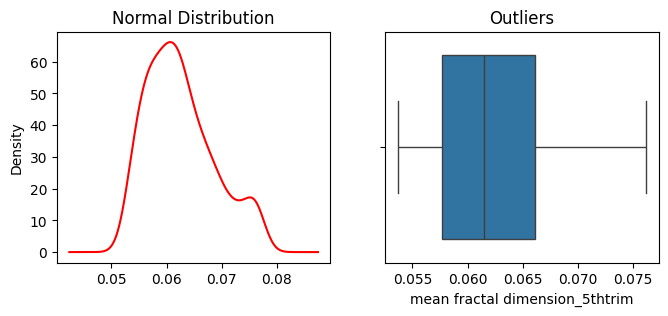

radius error_5thtrim


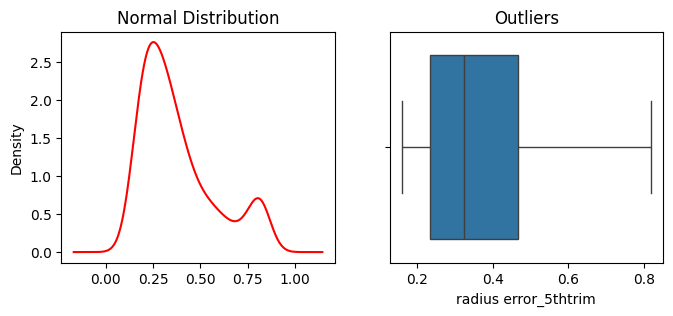

texture error_5thtrim


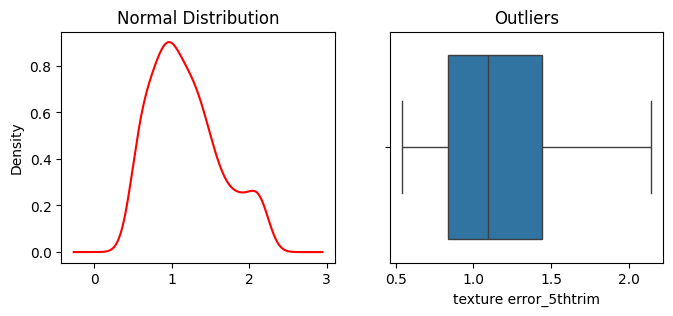

perimeter error_5thtrim


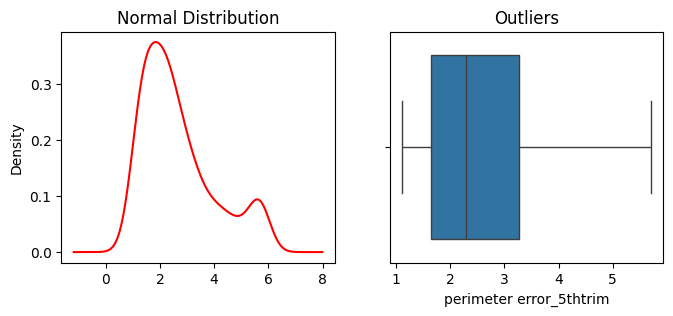

area error_5thtrim


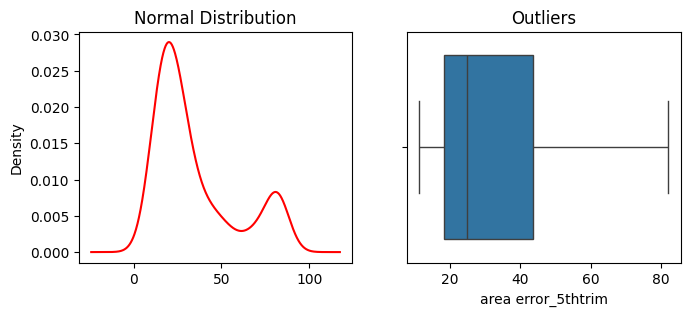

smoothness error_5thtrim


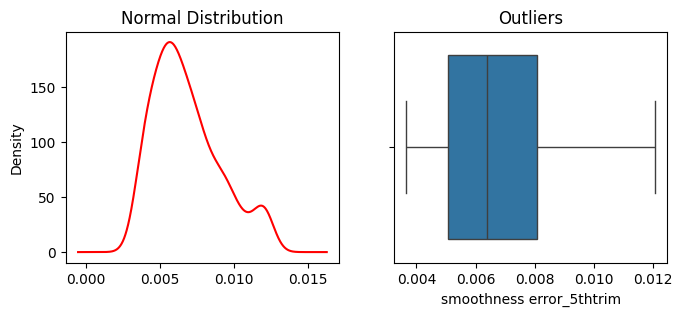

compactness error_5thtrim


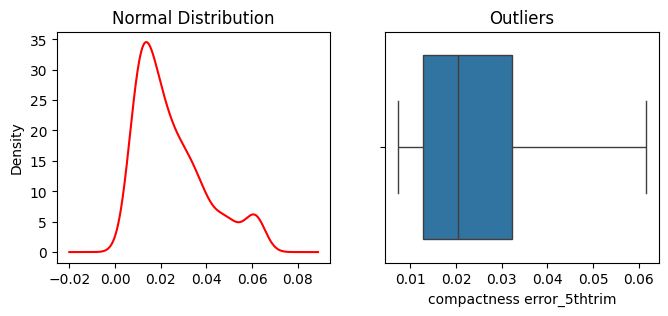

concavity error_5thtrim


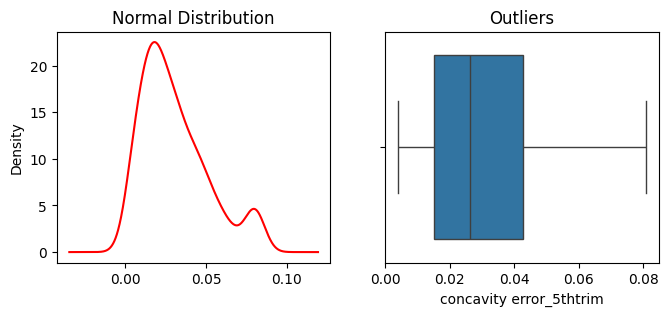

concave points error_5thtrim


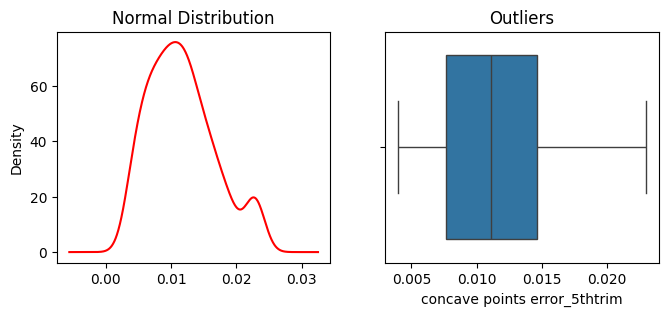

symmetry error_5thtrim


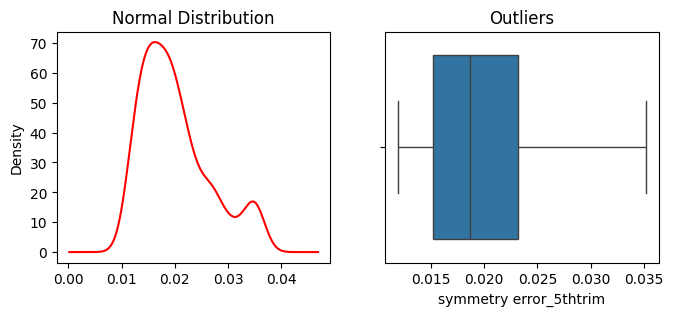

fractal dimension error_5thtrim


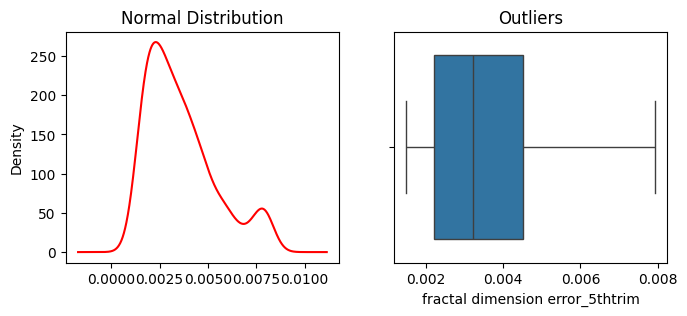

worst radius_5thtrim


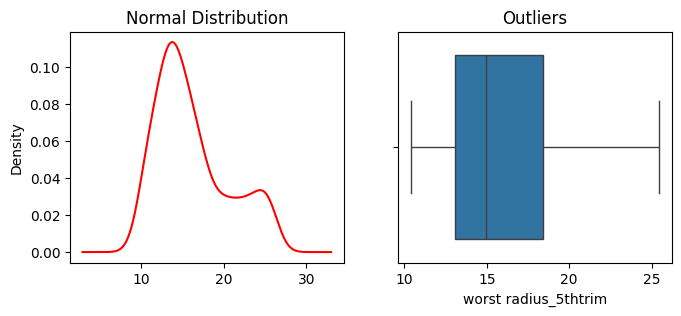

worst texture_5thtrim


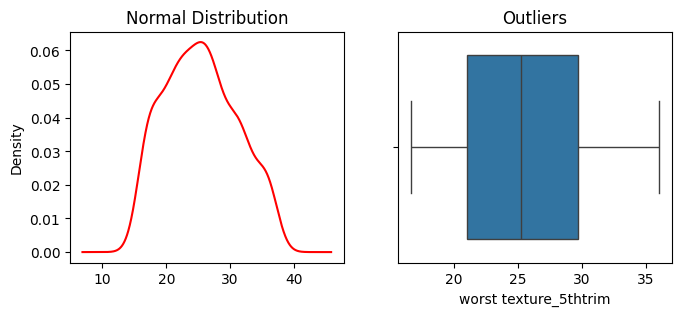

worst perimeter_5thtrim


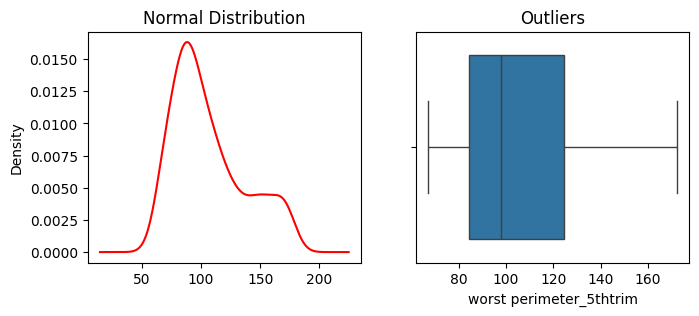

worst area_5thtrim


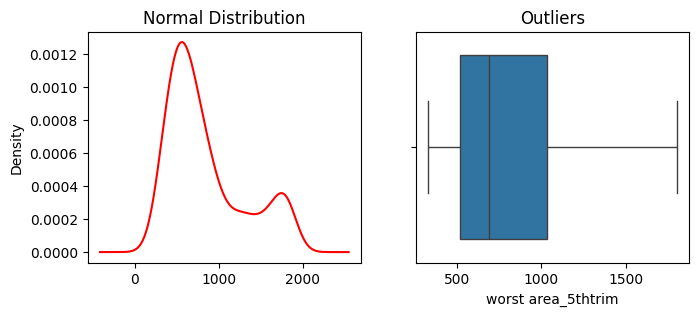

worst smoothness_5thtrim


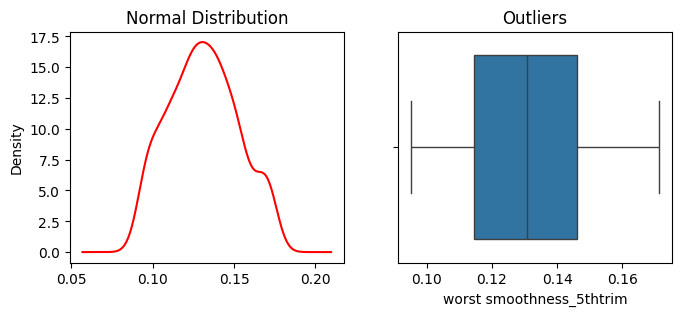

worst compactness_5thtrim


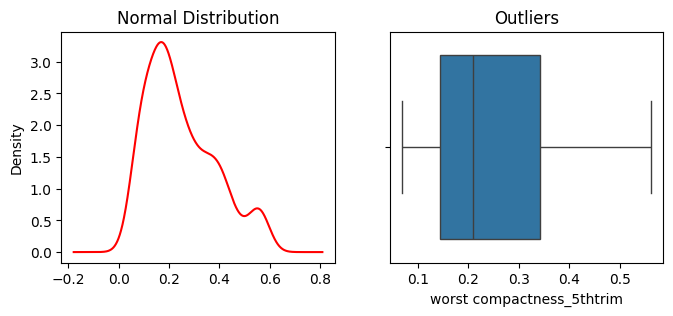

worst concavity_5thtrim


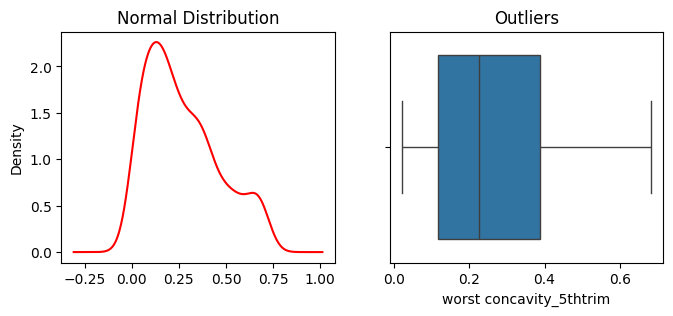

worst concave points_5thtrim


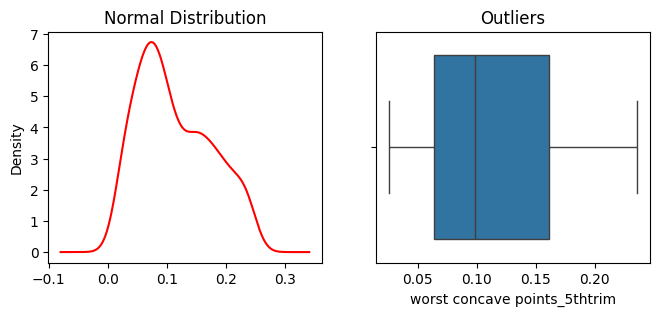

worst symmetry_5thtrim


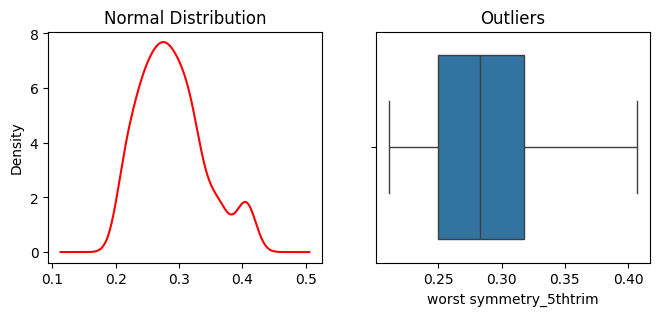

worst fractal dimension_5thtrim


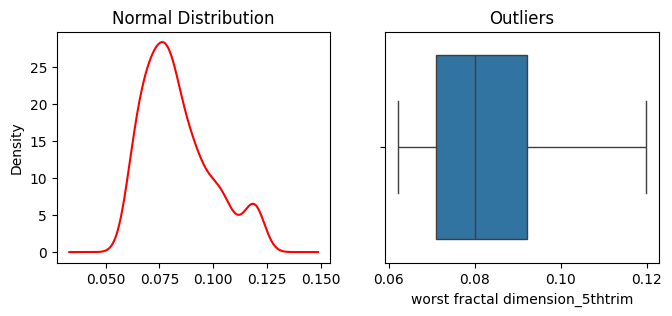

In [71]:
for i in X_train.columns:
  if 'trim' in i:
    outlier_checking(X_train,i)

In [72]:
# trimming on test data

def trim(X_test,var):
  iqr = X_test[var].quantile(0.75) - X_test[var].quantile(0.25)
  upper_limit = X_test[var].quantile(0.75) + (1.5 * iqr)
  lower_limit = X_test[var].quantile(0.25) - (1.5 * iqr)

  return upper_limit,lower_limit

for i in X_test.columns:
  upper_limit,lower_limit = trim(X_test,i)
  X_test[i+'trim'] = np.where(X_test[i] > upper_limit,upper_limit,
         np.where(X_test[i] < lower_limit,lower_limit,X_test[i]))

X_test=X_test.drop(['mean radius_5th', 'mean texture_5th', 'mean perimeter_5th',
       'mean area_5th', 'mean smoothness_5th', 'mean compactness_5th',
       'mean concavity_5th', 'mean concave points_5th', 'mean symmetry_5th',
       'mean fractal dimension_5th', 'radius error_5th', 'texture error_5th',
       'perimeter error_5th', 'area error_5th', 'smoothness error_5th',
       'compactness error_5th', 'concavity error_5th',
       'concave points error_5th', 'symmetry error_5th',
       'fractal dimension error_5th', 'worst radius_5th', 'worst texture_5th',
       'worst perimeter_5th', 'worst area_5th', 'worst smoothness_5th',
       'worst compactness_5th', 'worst concavity_5th',
       'worst concave points_5th', 'worst symmetry_5th',
       'worst fractal dimension_5th'],axis=1)


mean radius_5thtrim


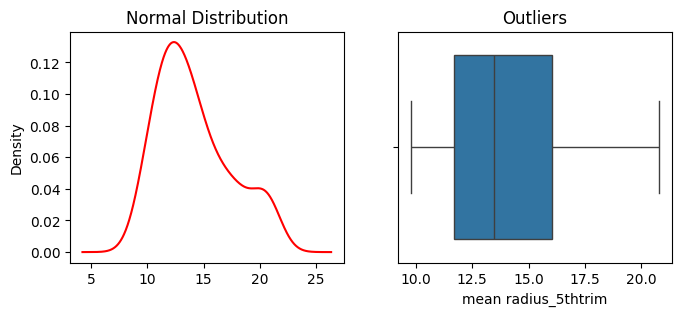

mean texture_5thtrim


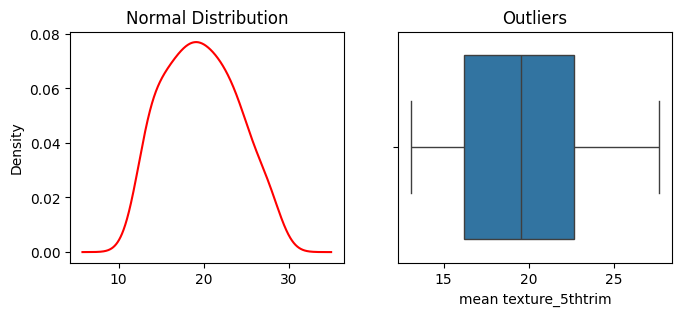

mean perimeter_5thtrim


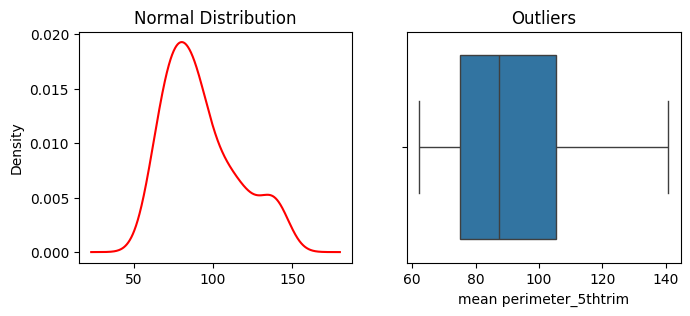

mean area_5thtrim


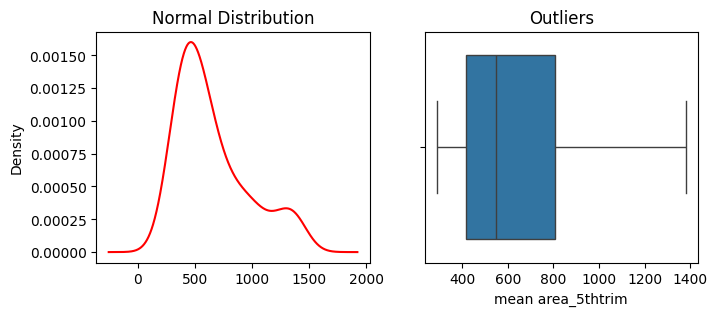

mean smoothness_5thtrim


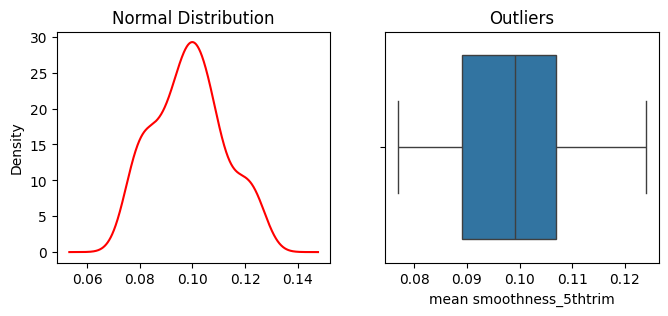

mean compactness_5thtrim


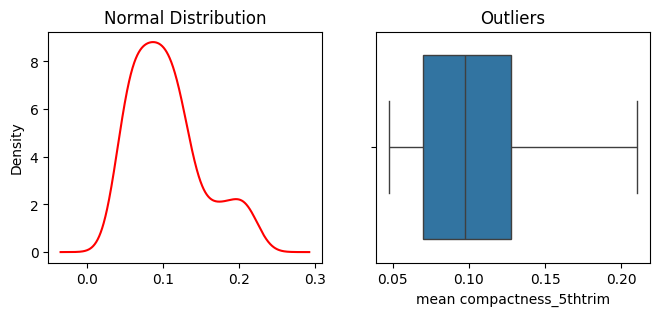

mean concavity_5thtrim


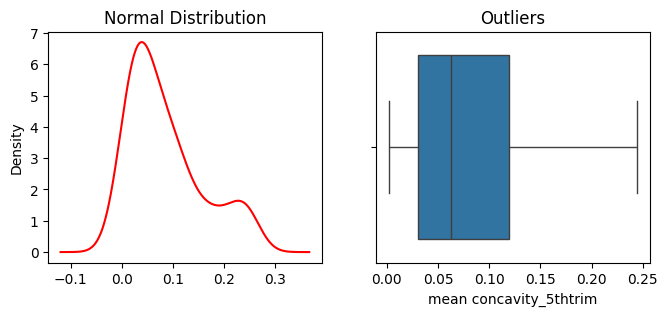

mean concave points_5thtrim


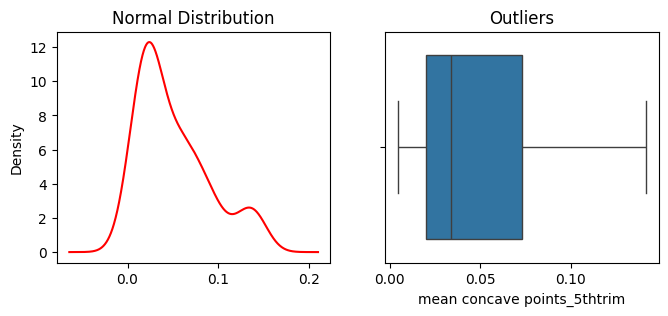

mean symmetry_5thtrim


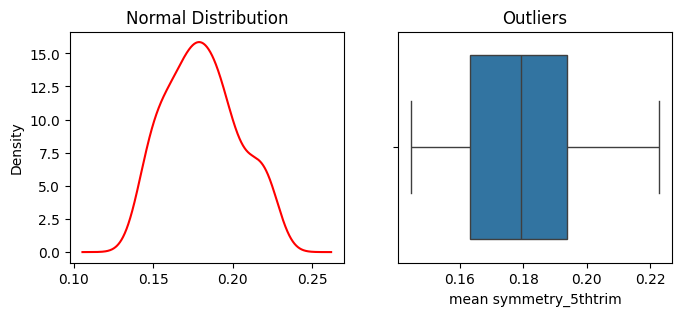

mean fractal dimension_5thtrim


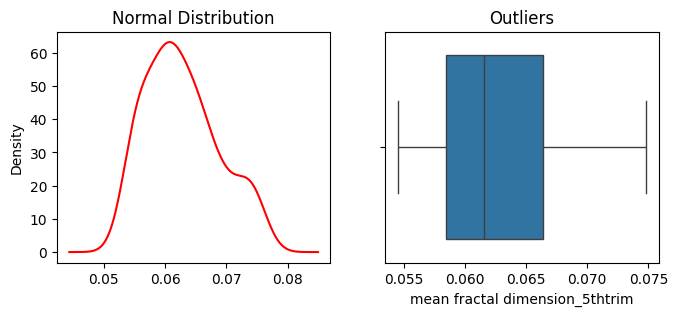

radius error_5thtrim


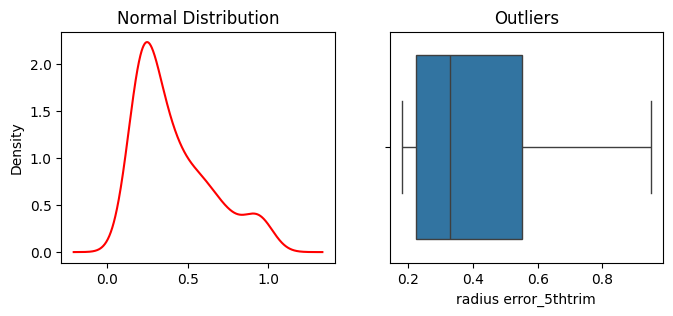

texture error_5thtrim


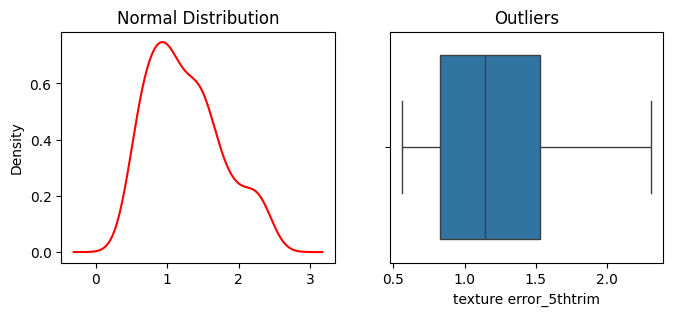

perimeter error_5thtrim


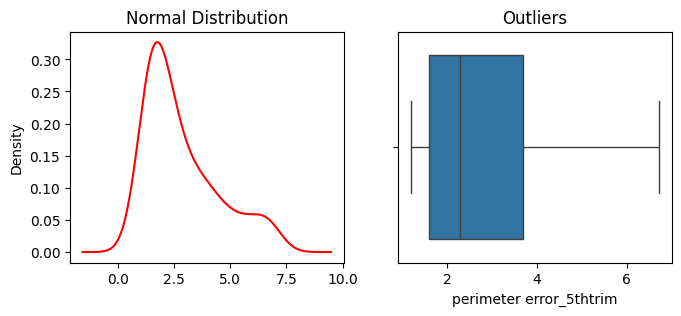

area error_5thtrim


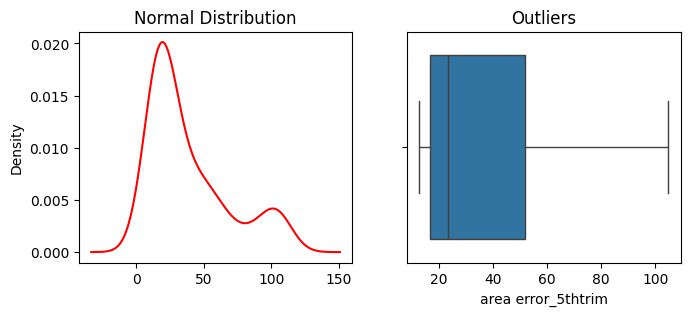

smoothness error_5thtrim


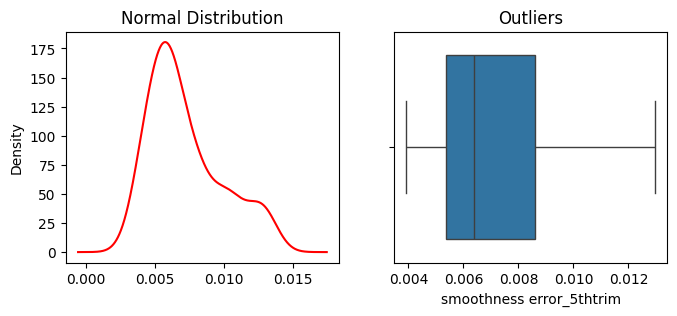

compactness error_5thtrim


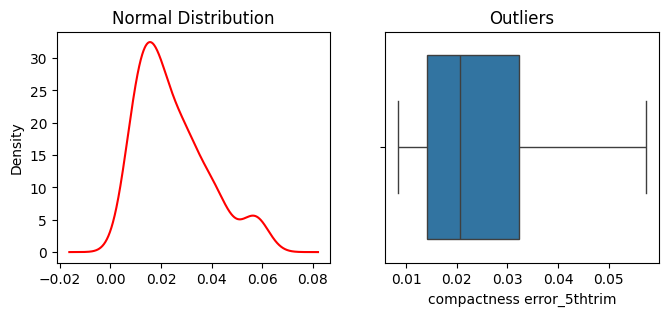

concavity error_5thtrim


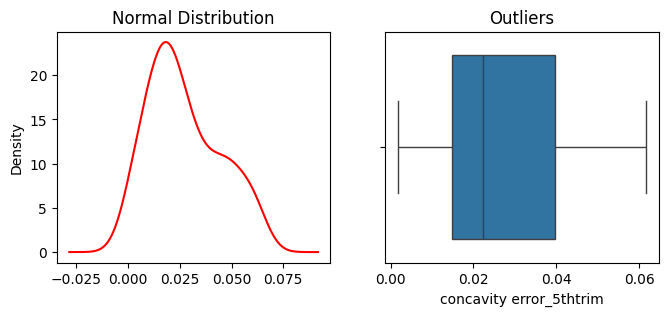

concave points error_5thtrim


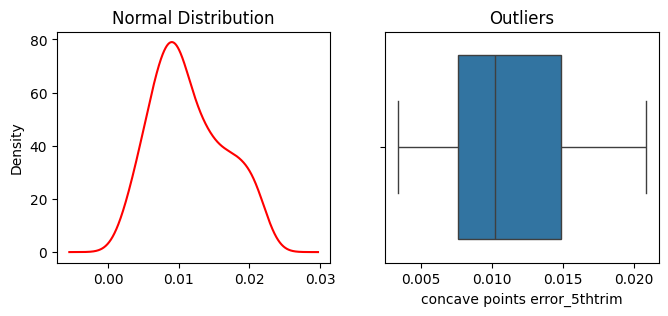

symmetry error_5thtrim


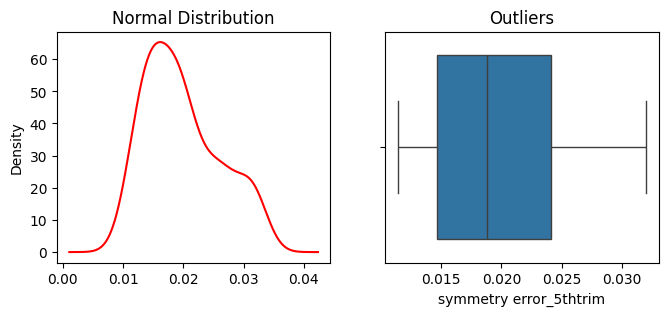

fractal dimension error_5thtrim


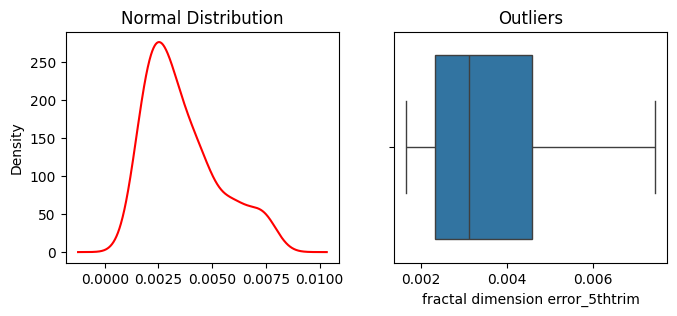

worst radius_5thtrim


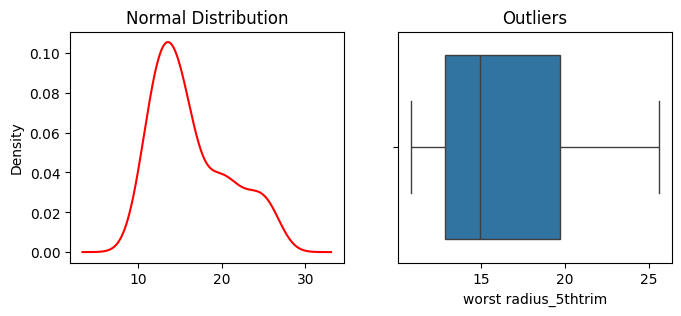

worst texture_5thtrim


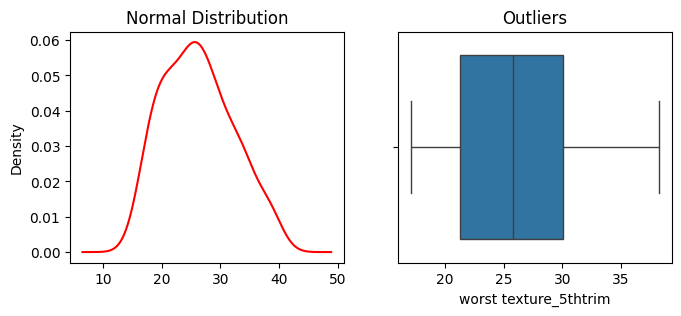

worst perimeter_5thtrim


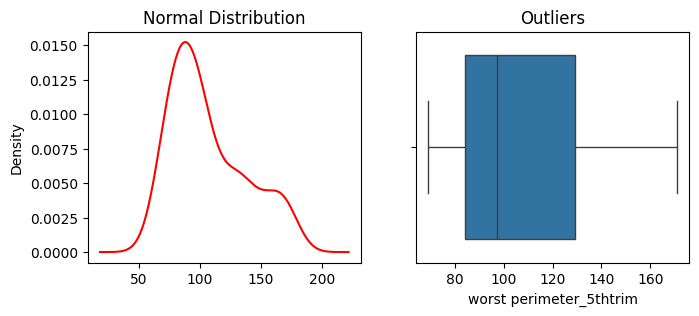

worst area_5thtrim


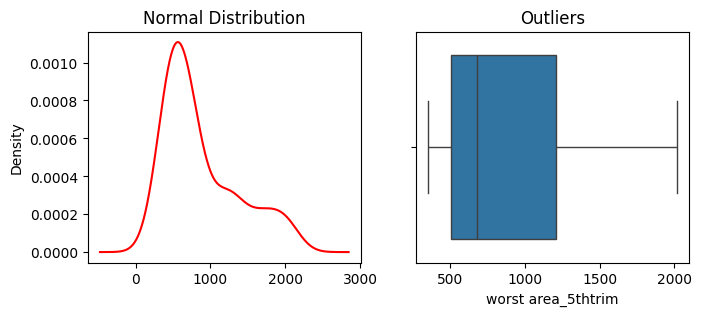

worst smoothness_5thtrim


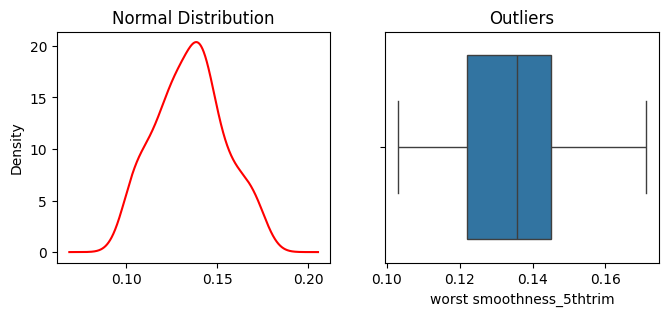

worst compactness_5thtrim


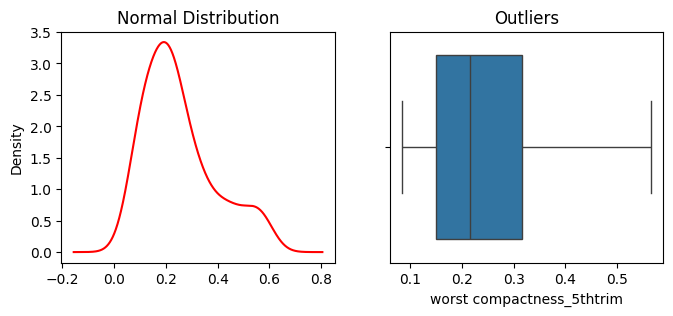

worst concavity_5thtrim


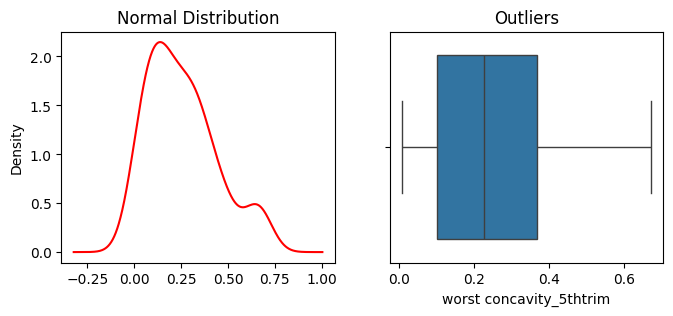

worst concave points_5thtrim


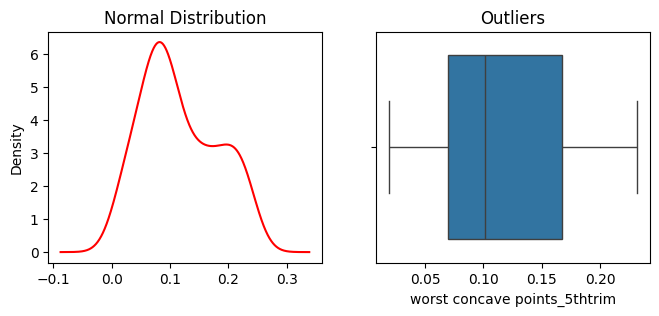

worst symmetry_5thtrim


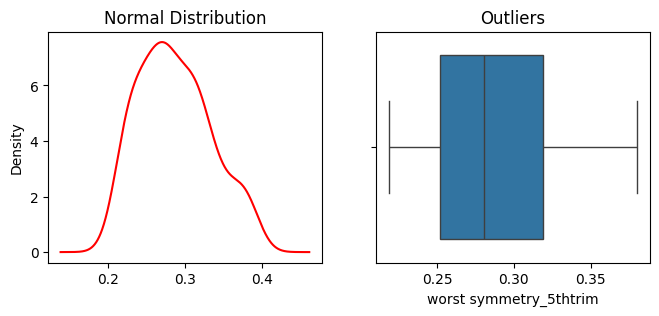

worst fractal dimension_5thtrim


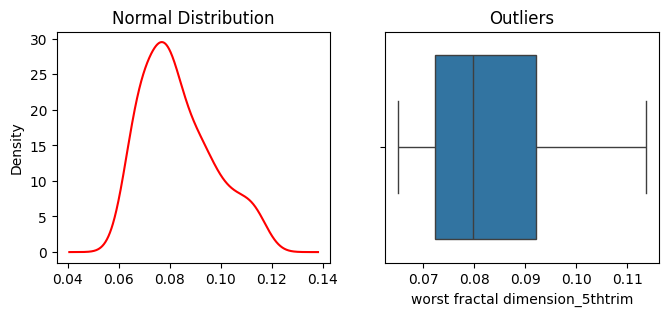

In [73]:
for i in X_test.columns:
  if 'trim' in i:
    outlier_checking(X_test,i)

**Scale down the data**

In [74]:
# standard_scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
res = sc.transform(X_train)

#res -> to give scaled down outputs

scaled_X_train = pd.DataFrame(data=res)
scaled_X_train.columns = X_train.columns

scaled_X_train.head()

mean radius_5thtrim  mean texture_5thtrim  mean perimeter_5thtrim  \
0            -1.442633             -0.466438               -1.432525   
1             2.034727              1.955697                2.009667   
2            -1.442633             -1.376049               -1.432525   
3            -1.066395              1.601814               -1.070845   
4            -1.217684             -1.108670               -1.230668   

   mean area_5thtrim  mean smoothness_5thtrim  mean compactness_5thtrim  \
0          -1.229746                 0.910020                  0.825218   
1           2.180431                 1.524809                  2.241396   
2          -1.229746                -1.499134                 -0.308525   
3          -0.978488                 0.087842                 -0.628266   
4          -1.096249                 1.467428                 -0.453958   

   mean concavity_5thtrim  mean concave points_5thtrim  mean symmetry_5thtrim  \
0                2.242049                    -0.095404               1.262287   
1                2.242049                     2.147947               2.107290   
2               -0.371832                    -0.741618               2.107290   
3               -0.891269                    -0.907956               0.380185   
4               -1.077656                    -1.003637               2.107290   

   mean fractal dimension_5thtrim  ...  worst radius_5thtrim  \
0                        2.250681  ...             -1.319987   
1                        1.887186  ...              2.152985   
2                        1.171709  ...             -1.319987   
3                        0.128923  ...             -0.889605   
4                        1.166775  ...             -1.172690   

   worst texture_5thtrim  worst perimeter_5thtrim  worst area_5thtrim  \
0              -0.498841                -1.301474           -1.139670   
1               1.444204                 2.189736            2.145118   
2              -1.112434                -1.301474           -1.139670   
3               1.751001                -0.939158           -0.853623   
4              -1.431790                -1.208696           -1.047331   

   worst smoothness_5thtrim  worst compactness_5thtrim  \
0                  0.814017                   1.396325   
1                  0.856919                   2.317664   
2                 -1.561804                  -0.584980   
3                  0.895054                  -0.791443   
4                 -0.172730                  -1.094795   

   worst concavity_5thtrim  worst concave points_5thtrim  \
0                 2.167717                      0.993531   
1                 2.148338                      1.987168   
2                -0.678693                     -1.019858   
3                -0.821541                     -0.849710   
4                -1.298507                     -1.426656   

   worst symmetry_5thtrim  worst fractal dimension_5thtrim  
0                2.329002                         2.179324  
1                2.329002                         2.329795  
2                0.780021                         0.100789  
3                1.028751                        -0.117904  
4                1.318610                        -0.198877  

[5 rows x 30 columns]

In [75]:
# to apply same thing on test data

res = sc.transform(X_test)

scaled_X_test = pd.DataFrame(data=res)
scaled_X_test.columns = X_test.columns

scaled_X_test.head()

mean radius_5thtrim  mean texture_5thtrim  mean perimeter_5thtrim  \
0            -0.492755             -0.133525               -0.466660   
1             1.546503              0.576863                1.496941   
2             0.449653              0.097154                0.485347   
3            -0.514818             -0.374690               -0.449107   
4            -0.785879             -1.224010               -0.764134   

   mean area_5thtrim  mean smoothness_5thtrim  mean compactness_5thtrim  \
0          -0.525896                 0.340315                  0.076977   
1           1.648493                -0.443336                  0.015853   
2           0.369894                 1.123147                  0.424751   
3          -0.573202                 0.811653                  0.620769   
4          -0.790943                 0.355890                  0.207656   

   mean concavity_5thtrim  mean concave points_5thtrim  mean symmetry_5thtrim  \
0               -0.081529                    -0.258503               0.495600   
1                0.320751                     0.957381              -0.918235   
2                0.876314                     0.997420               0.520332   
3               -0.119526                    -0.559383               0.025696   
4               -0.264030                    -0.619736               0.054550   

   mean fractal dimension_5thtrim  ...  worst radius_5thtrim  \
0                        0.201293  ...             -0.263596   
1                       -1.298741  ...              2.012593   
2                       -0.747742  ...              0.723750   
3                        1.400333  ...             -0.744610   
4                        0.874005  ...             -0.887304   

   worst texture_5thtrim  worst perimeter_5thtrim  worst area_5thtrim  \
0              -0.141809                -0.339337           -0.359458   
1               0.206253                 1.979284            2.282837   
2               0.102193                 0.618318            0.703821   
3              -0.452193                -0.553108           -0.719963   
4              -1.031698                -0.912602           -0.848953   

   worst smoothness_5thtrim  worst compactness_5thtrim  \
0                  0.547071                  -0.068823   
1                 -0.563616                  -0.099793   
2                  1.119098                  -0.057025   
3                  0.661476                   0.116256   
4                  0.160952                  -0.260539   

   worst concavity_5thtrim  worst concave points_5thtrim  \
0                -0.009616                     -0.198640   
1                -0.001214                      1.056789   
2                 0.578582                      0.610739   
3                -0.150364                     -0.649556   
4                -0.468622                     -0.722870   

   worst symmetry_5thtrim  worst fractal dimension_5thtrim  
0                0.255143                         0.266561  
1               -0.651644                        -1.111265  
2               -0.091512                        -0.199515  
3               -0.641852                         0.654852  
4               -1.086432                        -0.126192  

[5 rows x 30 columns]






**Since the data is ready we need to train the Algorithms**

In [76]:
def knn_algo(x_train,y_train,x_test,y_test):
  knn_res = KNeighborsClassifier(n_neighbors=5) # default k_value is 5
  knn_res.fit(x_train,y_train)
  y_test_pred = knn_res.predict(x_test)
  print(f'Training Accuracy : {knn_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {knn_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')

In [77]:
def naive_bayes_algo(x_train,y_train,x_test,y_test):
  nav_res = GaussianNB()
  nav_res.fit(x_train,y_train)
  y_test_pred = nav_res.predict(x_test)
  print(f'Training Accuracy : {nav_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {nav_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')

In [78]:
def log_reg_algo(x_train,y_train,x_test,y_test):
  lg_res = LogisticRegression()
  lg_res.fit(x_train,y_train)
  y_test_pred = lg_res.predict(x_test)
  print(f'Training Accuracy : {lg_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {lg_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')

In [79]:
def dt_algo(x_train,y_train,x_test,y_test):
  dt_res = DecisionTreeClassifier(criterion='entropy')
  dt_res.fit(x_train,y_train)
  y_test_pred = dt_res.predict(x_test)
  print(f'Training Accuracy : {dt_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {dt_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')

In [80]:
def rf_algo(x_train,y_train,x_test,y_test):
  rf_res = RandomForestClassifier(criterion='entropy',n_estimators=11)
  rf_res.fit(x_train,y_train)
  y_test_pred = rf_res.predict(x_test)
  print(f'Training Accuracy : {rf_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {rf_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')

In [81]:
def common(x_train,y_train,x_test,y_test):
  print('-----knn-------')
  knn_algo(x_train,y_train,x_test,y_test)
  print('-----Naive Bayes------')
  naive_bayes_algo(x_train,y_train,x_test,y_test)
  print('-----Logistic Regression-------')
  log_reg_algo(x_train,y_train,x_test,y_test)
  print('-----Decision Tree-------')
  dt_algo(x_train,y_train,x_test,y_test)
  print('-----Random Forest-------')
  rf_algo(x_train,y_train,x_test,y_test)

In [82]:
final_X_train = scaled_X_train.copy()
final_y_train = y_train.copy()
final_X_test = scaled_X_test.copy()
final_y_test = y_test.copy()

In [83]:
common(final_X_train,final_y_train,final_X_test,final_y_test)

-----knn-------
Training Accuracy : 0.9802197802197802
Test Accuracy : 0.9473684210526315
Confusion Matrix Test data : [[40  3]
 [ 3 68]]
classification Report Test data :               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

-----Naive Bayes------
Training Accuracy : 0.9318681318681319
Test Accuracy : 0.9736842105263158
Confusion Matrix Test data : [[41  2]
 [ 1 70]]
classification Report Test data :               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       

**To select the  best model**

In [84]:
from sklearn.metrics import precision_score

# Define KNN algorithm
def knn_algo(x_train, y_train, x_test, y_test):
    knn_res = KNeighborsClassifier(n_neighbors=5)
    knn_res.fit(x_train, y_train)
    y_test_pred = knn_res.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')

    return precision

# Define other algorithms similarly
def naive_bayes_algo(x_train, y_train, x_test, y_test):
    nb = GaussianNB()
    nb.fit(x_train, y_train)
    y_test_pred = nb.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')
    return precision

def log_reg_algo(x_train, y_train, x_test, y_test):
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    y_test_pred = lr.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')
    return precision

def dt_algo(x_train, y_train, x_test, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_test_pred = dt.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')
    return precision

def rf_algo(x_train, y_train, x_test, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_test_pred = rf.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')
    return precision

# Common function to find the best precision
def common(x_train, y_train, x_test, y_test):
    precisions = {}

    print('-----KNN-------')
    precisions['KNN'] = knn_algo(x_train, y_train, x_test, y_test)

    print('-----Naive Bayes------')
    precisions['Naive Bayes'] = naive_bayes_algo(x_train, y_train, x_test, y_test)

    print('-----Logistic Regression-------')
    precisions['Logistic Regression'] = log_reg_algo(x_train, y_train, x_test, y_test)

    print('-----Decision Tree-------')
    precisions['Decision Tree'] = dt_algo(x_train, y_train, x_test, y_test)

    print('-----Random Forest-------')
    precisions['Random Forest'] = rf_algo(x_train, y_train, x_test, y_test)

    # Find the model with the best precision
    best_model = max(precisions, key=precisions.get)
    print(f"\nBest Model: {best_model} with Precision: {precisions[best_model]:.4f}")


common(final_X_train,final_y_train,final_X_test,final_y_test)

-----KNN-------
-----Naive Bayes------
-----Logistic Regression-------
-----Decision Tree-------
-----Random Forest-------

Best Model: Logistic Regression with Precision: 0.9813


In [85]:
#In the above Logistic Regression  is the best model because this algorithm has  high  precision and recall value
#To select best parameters

from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
model = LogisticRegression()
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,  # Number of folds for cross-validation
                           scoring='accuracy')  # You can choose other metrics like 'f1_macro', 'precision', 'recall'
grid_search.fit(final_X_train, final_y_train)
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [86]:
#  Apply Best parameters

final_model = LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')
final_model.fit(final_X_train, final_y_train)



print(f'Final Test Accuracy : {final_model.score(final_X_test,final_y_test)}')

Final Test Accuracy : 0.9736842105263158


In [87]:
len(final_X_train.columns)

30

In [88]:
# To check the model

values = np.random.random((5,6)).ravel()

if final_model.predict(sc.transform([values]))[0] == 0:
  print(f'malignant')
else:
  print(f'benign')


benign


In [89]:
# Save the model

import pickle
with open ('Breast_cancer.pkl','wb') as f:
  pickle.dump(final_model,f)

In [90]:
#Save the scaling

import pickle
with open('scaling.pkl','wb') as f:
   pickle.dump(sc,f)